## Participants based analysis

In [95]:
import numpy as np
import pandas as pd
import openai

In [96]:
df = pd.read_csv('~/knowledge-explore/data/processed_data/reference_dataset_v1.csv')

In [97]:
len(df['participant_id'].unique())

300

In [98]:
df.head(5)

,Unnamed: 0,problem_id,participant_id,DAT,CRT2,CURIOSITY_SCORE,AGE,GENDER,EDUCATION,EMPLOYMENT,...,POLITICAL,CLIMATE,COVID,NEWS,MEDIA,RELATION_KNOWLEDGE,RELATION_INTEREST,RELATION_CONCERN,ideas,emb_ideas
0,0,Q1,00278,74.104969,3,4.229167,24,1,5,1,...,2,1,1,4,5,2,4,4,"['vaccination schemes in these areas', 'increa...","[[-0.011656875722110271, -0.019422005861997604..."
1,1,Q2,00278,74.104969,3,4.229167,24,1,5,1,...,2,1,1,4,5,3,5,5,['equal pay for women and men in the same role...,"[[-0.0034376916009932756, 0.006209875456988811..."
2,2,Q3,00278,74.104969,3,4.229167,24,1,5,1,...,2,1,1,4,5,3,5,5,"['look into conservation plans ', 'ensure poac...","[[0.03516001999378204, -0.004544570576399565, ..."
3,3,Q4,00278,74.104969,3,4.229167,24,1,5,1,...,2,1,1,4,5,3,4,3,"['make it more affordable ', 'make it more rel...","[[-0.0006349863833747804, -0.02672582119703293..."
4,4,Q5,00278,74.104969,3,4.229167,24,1,5,1,...,2,1,1,4,5,3,5,5,"['a better work-life balance ', 'more flexible...","[[0.01157371699810028, 0.009878437966108322, 0..."


In [99]:
df = df.rename(columns = {'participant_id': 'PARTICIPANT_ID'})
# df = df.set_index('PARTICIPANT_ID')

In [100]:
df_1_whole = df.loc[df['problem_id'] == 'Q1'][['PARTICIPANT_ID','ideas', 'emb_ideas']]
df_2_whole = df.loc[df['problem_id'] == 'Q2'][['PARTICIPANT_ID','ideas', 'emb_ideas']]
df_3_whole = df.loc[df['problem_id'] == 'Q3'][['PARTICIPANT_ID','ideas', 'emb_ideas']]
df_4_whole = df.loc[df['problem_id'] == 'Q4'][['PARTICIPANT_ID','ideas', 'emb_ideas']]
df_5_whole = df.loc[df['problem_id'] == 'Q5'][['PARTICIPANT_ID','ideas', 'emb_ideas']]


In [101]:
df_1 = df_1_whole[['PARTICIPANT_ID','ideas']]
df_2 = df_2_whole[['PARTICIPANT_ID','ideas']]
df_3 = df_3_whole[['PARTICIPANT_ID','ideas']]
df_4 = df_4_whole[['PARTICIPANT_ID','ideas']]
df_5 = df_5_whole[['PARTICIPANT_ID','ideas']]

In [102]:
# idea values are stored as string, not the list. So str -> list
import ast

df_1['ideas']= df_1['ideas'].map(ast.literal_eval)
df_2['ideas']= df_2['ideas'].map(ast.literal_eval)
df_3['ideas']= df_3['ideas'].map(ast.literal_eval)
df_4['ideas']= df_4['ideas'].map(ast.literal_eval)
df_5['ideas']= df_5['ideas'].map(ast.literal_eval)


# unlist and make new rows
df_1 = df_1.explode('ideas')
df_2 = df_2.explode('ideas')
df_3 = df_3.explode('ideas')
df_4 = df_4.explode('ideas')
df_5 = df_5.explode('ideas')

/tmp/ipykernel_1294025/174871924.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['ideas']= df_1['ideas'].map(ast.literal_eval)
/tmp/ipykernel_1294025/174871924.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['ideas']= df_2['ideas'].map(ast.literal_eval)
/tmp/ipykernel_1294025/174871924.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [103]:
# delete the second level of index and concatenate only with the first one.
df_1 = df_1.set_index('PARTICIPANT_ID')
df_2 = df_2.set_index('PARTICIPANT_ID')
df_3 = df_3.set_index('PARTICIPANT_ID')
df_4 = df_4.set_index('PARTICIPANT_ID')
df_5 = df_5.set_index('PARTICIPANT_ID')

# sort the dataframe by the participant id
df_1 = df_1.sort_index()
df_2 = df_2.sort_index()
df_3 = df_3.sort_index()
df_4 = df_4.sort_index()
df_5 = df_5.sort_index()

In [104]:
df_1 = df_1.squeeze()
df_2 = df_2.squeeze()
df_3 = df_3.squeeze()
df_4 = df_4.squeeze()
df_5 = df_5.squeeze()

In [105]:
df_1

PARTICIPANT_ID
00278                   vaccination schemes in these areas
00278                    increase awareness and education 
00278                         mass vaccination programmes 
00278         gp practices to discuss with their patients 
00278    advertisement of vaccination needs and availab...
                               ...                        
fb9c4    visiting local schools and vaccinating childre...
fb9c4         offering door to door vaccination programmes
ff2bf                 education of benefits to vaccination
ff2bf           reward with an incentive eg cash or goods 
ff2bf                        benefits for those vaccinated
Name: ideas, Length: 1294, dtype: object

## Preprocessing the text

0. null values
1. non-english answers
2. drop stopwords
3. lemmatization 

### Null values handling

In [106]:
# from df_1 to df_5: all showing none-null objects

print(df_1.info(), '\n')
print(df_2.info(), '\n')
print(df_3.info(), '\n')
print(df_4.info(), '\n')
print(df_5.info(), '\n')

<class 'pandas.core.series.Series'>
Index: 1294 entries, 00278 to ff2bf
Series name: ideas
Non-Null Count  Dtype 
--------------  ----- 
1294 non-null   object
dtypes: object(1)
memory usage: 52.5+ KB
None 

<class 'pandas.core.series.Series'>
Index: 1299 entries, 00278 to ff2bf
Series name: ideas
Non-Null Count  Dtype 
--------------  ----- 
1299 non-null   object
dtypes: object(1)
memory usage: 20.3+ KB
None 

<class 'pandas.core.series.Series'>
Index: 1330 entries, 00278 to ff2bf
Series name: ideas
Non-Null Count  Dtype 
--------------  ----- 
1330 non-null   object
dtypes: object(1)
memory usage: 20.8+ KB
None 

<class 'pandas.core.series.Series'>
Index: 1228 entries, 00278 to ff2bf
Series name: ideas
Non-Null Count  Dtype 
--------------  ----- 
1228 non-null   object
dtypes: object(1)
memory usage: 19.2+ KB
None 

<class 'pandas.core.series.Series'>
Index: 1311 entries, 00278 to ff2bf
Series name: ideas
Non-Null Count  Dtype 
--------------  ----- 
1311 non-null   object
dtypes: 

## Question 1

### Make lower case, drop stopwords

In [107]:
# Data cleaning & preprocessing
import nltk
import re
from nltk.corpus import stopwords

# Lemmatizer modules
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /mnt/home/kim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [108]:
# define the dataframe for preprocessing
data = df_1.copy()

In [109]:
len(data)

1294

In [110]:
data.index

Index(['00278', '00278', '00278', '00278', '00278', '0068d', '0068d', '0068d',
       '0068d', '0068d',
       ...
       'fb2a2', 'fb2a2', 'fb2a2', 'fb9c4', 'fb9c4', 'fb9c4', 'fb9c4', 'ff2bf',
       'ff2bf', 'ff2bf'],
      dtype='object', name='PARTICIPANT_ID', length=1294)

In [111]:
df_1

PARTICIPANT_ID
00278                   vaccination schemes in these areas
00278                    increase awareness and education 
00278                         mass vaccination programmes 
00278         gp practices to discuss with their patients 
00278    advertisement of vaccination needs and availab...
                               ...                        
fb9c4    visiting local schools and vaccinating childre...
fb9c4         offering door to door vaccination programmes
ff2bf                 education of benefits to vaccination
ff2bf           reward with an incentive eg cash or goods 
ff2bf                        benefits for those vaccinated
Name: ideas, Length: 1294, dtype: object

In [112]:
# Remove special characters, lower the cases, remove stopwords.

# dictionary to contain
new_dict = {new_list: [] for new_list in data.index}

# list of index
ind_list = data.index.to_list()

# preprocess - remove special character, lower case, drop stopwords
for i in range(len(data)): 
    
    text = data.iloc[i]
    
    temp = re.sub('\W+', " ", text)
    temp = temp.lower()
    temp = temp.split()
    temp = [word for word in temp if not word in stopwords.words('english')]
    temp = ' '.join(temp)
    
    new_dict[ind_list[i]].append(temp)

In [113]:
# we can see that there are many missing values in the dataframe. Not just null valued participants but some are answered but some are not in the participant. 

### Lemmatization

In [114]:
# This seems very plausible for the lemmatization.
for a in new_dict.items(): 
    print(a[1])

['vaccination schemes areas', 'increase awareness education', 'mass vaccination programmes', 'gp practices discuss patients', 'advertisement vaccination needs availability']
['mobile vaccination vans used', 'ask various clerical leaders pass message congregation', 'introduce topic schools', 'advertise local shops', 'use adverts local papers']
['get people vaccinations travel rural area', 'get rural gp advocate vaccination', 'pr benefits vaccines', 'putting money trust til 18', 'free transport less rural area']
['visiting nurses', 'drop rural clinics', 'evening visits', 'leaflet every home', 'use gp surgery']
['organise targeted campaign rural areas', 'engage spokesperson would relatable people rural areas', 'ensure people rural areas easy access vaccination centres', 'televise targeted ads', 'inquiry get vaccinated']
['take vaccinations rural areas', 'offer rewards vaccination', 'run clinics make people aware risks', 'drop clinic', 'leafet drop']
['better advertising', 'mobile vaccinat

In [115]:
lemmatizer = WordNetLemmatizer()

In [116]:
for pair in new_dict.items():
    new_dict[pair[0]] = [lemmatizer.lemmatize(answer) for answer in pair[1]]

In [117]:
result_df = pd.DataFrame.from_dict(new_dict, orient='index').T.stack()

In [118]:
result_df = result_df.reset_index(level=0, drop=True)

In [119]:
result_df = result_df.sort_index()

In [120]:
# Replace the df_1 with the dataframe containing processed data.
df_1 = result_df

## Question 2

### Make lower case, drop stopwords

In [121]:
# define the dataframe for preprocessing
data = df_2.copy()

In [122]:
len(data)

1299

In [123]:
data.index

Index(['00278', '00278', '00278', '00278', '00278', '0068d', '0068d', '0068d',
       '0068d', '0068d',
       ...
       'fb2a2', 'fb2a2', 'fb9c4', 'fb9c4', 'fb9c4', 'fb9c4', 'fb9c4', 'ff2bf',
       'ff2bf', 'ff2bf'],
      dtype='object', name='PARTICIPANT_ID', length=1299)

In [124]:
# Remove special characters, lower the cases, remove stopwords.

# dictionary to contain
new_dict = {new_list: [] for new_list in data.index}

# list of index
ind_list = data.index.to_list()

# preprocess - remove special character, lower case, drop stopwords
for i in range(len(data)): 
    
    text = data.iloc[i]
    
    temp = re.sub('\W+', " ", text)
    temp = temp.lower()
    temp = temp.split()
    temp = [word for word in temp if not word in stopwords.words('english')]
    temp = ' '.join(temp)
    
    new_dict[ind_list[i]].append(temp)

### Lemmatization

In [125]:
# This seems very plausible for the lemmatization.
for a in new_dict.items(): 
    print(a[1])

['equal pay women men roles', 'ensure women voices heard', 'women equally considered promotions', 'education sexual harassment', 'women seen equal men capable']
['ensure equal salaries paid', 'people regardless sex', 'make allowances difference within reason', 'ensure separate facilities gender', 'ensure strict rules gender equality place']
['ensuring equal pay', 'ensuring fair 50 50 split men woman', 'allowing woman become bosses', 'better maternity rules making normal fathers take maternity time', 'unconcious bias training']
['employ equal numbers', 'target desired gender', 'improve workplace', 'use recruitment agency', 'increase salary']
['hire women non binary people', 'organise programmes encourage professional development women nb people', 'champion gender equality everything', 'anonymise first stages hiring process see gender person', 'provide work training opportunities boost confidence women nb']
['tread', 'pay', 'ask staff would improve', 'wear confortable', 'committee look p

In [126]:
# Lemmatizer modules
lemmatizer = WordNetLemmatizer()

In [127]:
for pair in new_dict.items():
    new_dict[pair[0]] = [lemmatizer.lemmatize(answer) for answer in pair[1]]

In [128]:
result_df = pd.DataFrame.from_dict(new_dict, orient='index').T.stack()

In [129]:
result_df = result_df.reset_index(level=0, drop=True)

In [130]:
result_df = result_df.sort_index()

In [131]:
# Replace the df_1 with the dataframe containing processed data.
df_2 = result_df

In [132]:
df_2

00278                            equal pay women men roles
00278                  women equally considered promotions
00278                            ensure women voices heard
00278                         women seen equal men capable
00278                          education sexual harassment
                               ...                        
fb9c4             females high paying roles within company
fb9c4    offering male female workers time maternity pa...
ff2bf                               identify problem areas
ff2bf                      gender identity workshops staff
ff2bf                     look current procedures improved
Length: 1299, dtype: object

## Question 3

### Make lower case, drop stopwords

In [133]:
# define the dataframe for preprocessing
data = df_3.copy()

In [134]:
len(data)

1330

In [135]:
data.index

Index(['00278', '00278', '00278', '00278', '00278', '0068d', '0068d', '0068d',
       '0068d', '0068d',
       ...
       'fb2a2', 'fb2a2', 'fb9c4', 'fb9c4', 'fb9c4', 'fb9c4', 'fb9c4', 'ff2bf',
       'ff2bf', 'ff2bf'],
      dtype='object', name='PARTICIPANT_ID', length=1330)

In [136]:
# Remove special characters, lower the cases, remove stopwords.

# dictionary to contain
new_dict = {new_list: [] for new_list in data.index}

# list of index
ind_list = data.index.to_list()

# preprocess - remove special character, lower case, drop stopwords
for i in range(len(data)): 
    
    text = data.iloc[i]
    
    temp = re.sub('\W+', " ", text)
    temp = temp.lower()
    temp = temp.split()
    temp = [word for word in temp if not word in stopwords.words('english')]
    temp = ' '.join(temp)
    
    new_dict[ind_list[i]].append(temp)

### Lemmatization

In [137]:
# This seems very plausible for the lemmatization.
for a in new_dict.items(): 
    print(a[1])

['look conservation plans', 'ensure poachers prosecuted stopped', 'protect land live', 'protected areas people cannot access', 'stop used human entertainment tourism']
['hefty fines', 'long prison sentences', 'educating schoolchildren', 'include local villagers tuition villagers', 'control border crossing checks']
['punishing poachers', 'armed guards around habitats', 'incentivising protection elephants', 'make ivory worthless', 'introduce breeding project']
['safe living areas', 'tourist based funding', 'preservation areas', 'scented candles', 'breeding programme']
['ban hunting elephants', 'create sanctuaries elephants', 'give elephants protected species status', 'disturbing natural habitat elephants', 'displacing elephants putting zoos circus']
['tv advert', 'ask donations', 'get celebraty indorse project', 'report major newspapers', 'educate elephants threat extinction']
['protections', 'harsher punishments kill', 'ban people coming near', 'environment protection', 'answers ai']
['

In [138]:
# Lemmatizer modules
lemmatizer = WordNetLemmatizer()

In [139]:
for pair in new_dict.items():
    new_dict[pair[0]] = [lemmatizer.lemmatize(answer) for answer in pair[1]]

In [140]:
result_df = pd.DataFrame.from_dict(new_dict, orient='index').T.stack()

In [141]:
result_df = result_df.reset_index(level=0, drop=True)

In [142]:
result_df = result_df.sort_index()

In [143]:
# Replace the df_1 with the dataframe containing processed data.
df_3 = result_df

In [144]:
df_3

00278                          look conservation plans
00278               ensure poachers prosecuted stopped
00278             protected areas people cannot access
00278            stop used human entertainment tourism
00278                                protect land live
                             ...                      
fb9c4     prosecute profit elephants called sancturies
fb9c4    create scheme impregnate lot female elephants
ff2bf                      protected elephant colonies
ff2bf                        ban ivory imports exports
ff2bf                              try breed captivity
Length: 1330, dtype: object

## Question 4

### Make lower case, drop stopwords

In [145]:
# define the dataframe for preprocessing
data = df_4.copy()

In [146]:
len(data)

1228

In [147]:
data.index

Index(['00278', '00278', '00278', '00278', '00278', '0068d', '0068d', '0068d',
       '0068d', '0068d',
       ...
       'fb2a2', 'fb2a2', 'fb9c4', 'fb9c4', 'fb9c4', 'fb9c4', 'fb9c4', 'ff2bf',
       'ff2bf', 'ff2bf'],
      dtype='object', name='PARTICIPANT_ID', length=1228)

In [148]:
# Remove special characters, lower the cases, remove stopwords.

# dictionary to contain
new_dict = {new_list: [] for new_list in data.index}

# list of index
ind_list = data.index.to_list()

# preprocess - remove special character, lower case, drop stopwords
for i in range(len(data)): 
    
    text = data.iloc[i]
    
    temp = re.sub('\W+', " ", text)
    temp = temp.lower()
    temp = temp.split()
    temp = [word for word in temp if not word in stopwords.words('english')]
    temp = ' '.join(temp)
    
    new_dict[ind_list[i]].append(temp)

### Lemmatization

In [149]:
# This seems very plausible for the lemmatization.
for a in new_dict.items(): 
    print(a[1])

['make affordable', 'make reliable', 'make accessible', 'hire staff support services', 'funding new faster routes']
['lower prices', 'ask local people', 'decrease gaps services', 'make direct routes instead going around many different areas', 'ensure buses time']
['better network frequent transport', 'reducing costs', 'loyalty card', 'bus lanes places make quicker travel bus', 'make public transport luxurious']
['lower price', 'increase reliability', 'increase frequency', 'connected routes', 'newer vehicles']
['dropping prices', 'offer free public transport', 'build tram lines train lines placeholder2 promote sustainable mode travel', 'offer good season tickets', 'improve look feel stations']
['make cheaper', 'make accsessable disabled users', 'incease amount services', 'make sure run time', 'one ticket weeks use']
['cheaper fares', 'frequent services', 'bus lanes roads', 'public ownership', 'bus sirens cars get way']
['reduce public transport prices', 'cleaner public transport', 'incr

In [150]:
# Lemmatizer modules
lemmatizer = WordNetLemmatizer()

In [151]:
for pair in new_dict.items():
    new_dict[pair[0]] = [lemmatizer.lemmatize(answer) for answer in pair[1]]

In [152]:
result_df = pd.DataFrame.from_dict(new_dict, orient='index').T.stack()

In [153]:
result_df = result_df.reset_index(level=0, drop=True)

In [154]:
result_df = result_df.sort_index()

In [155]:
# Replace the df_1 with the dataframe containing processed data.
df_4 = result_df

In [156]:
df_4

00278                              make affordable
00278                              make accessible
00278                  hire staff support services
00278                    funding new faster routes
00278                                make reliable
                           ...                    
fb9c4    lower price public transportation tickets
fb9c4        increase hygiene levels busses trains
ff2bf                               safer stations
ff2bf                less parking private vehicles
ff2bf                             free travel need
Length: 1228, dtype: object

## Question 5

### Make lower case, drop stopwords

In [157]:
# define the dataframe for preprocessing
data = df_5.copy()

In [158]:
len(data)

1311

In [159]:
data.index

Index(['00278', '00278', '00278', '00278', '00278', '0068d', '0068d', '0068d',
       '0068d', '0068d',
       ...
       'fb2a2', 'fb2a2', 'fb9c4', 'fb9c4', 'fb9c4', 'fb9c4', 'fb9c4', 'ff2bf',
       'ff2bf', 'ff2bf'],
      dtype='object', name='PARTICIPANT_ID', length=1311)

In [160]:
# Remove special characters, lower the cases, remove stopwords.

# dictionary to contain
new_dict = {new_list: [] for new_list in data.index}

# list of index
ind_list = data.index.to_list()

# preprocess - remove special character, lower case, drop stopwords
for i in range(len(data)): 
    
    text = data.iloc[i]
    
    temp = re.sub('\W+', " ", text)
    temp = temp.lower()
    temp = temp.split()
    temp = [word for word in temp if not word in stopwords.words('english')]
    temp = ' '.join(temp)
    
    new_dict[ind_list[i]].append(temp)

### Lemmatization

In [161]:
# This seems very plausible for the lemmatization.
for a in new_dict.items(): 
    print(a[1])

['better work life balance', 'flexible working', 'affordable bills housing', 'higher living wage', 'accessible healthcare']
['provide local events', 'ensure fairness people', 'positive news broadcast', 'bring back community nursing', 'advertise help available']
['4 day week', 'getting rid social media', 'automating processes', 'encouraging people use therapy', 'access relaxation therapies nhs']
['slow', 'reduce working hours', 'gardens allotments', 'reading groups', 'community activities']
['promote benefits meditation', 'focus benefits exercising mental health', 'encourage going nature', 'proper breaks social media', 'provide good working conditions focus well people rather profits']
['safe place people go', 'put mental health high priority work social life', 'reduce working stress life', 'weekly meeting talk stressing someone', 'mental helath places walk clinics']
['give people time work', 'better mental health support', 'universal basic income', 'recreation time work', 'better medic

In [162]:
# Lemmatizer modules
lemmatizer = WordNetLemmatizer()

In [163]:
for pair in new_dict.items():
    new_dict[pair[0]] = [lemmatizer.lemmatize(answer) for answer in pair[1]]

In [164]:
result_df = pd.DataFrame.from_dict(new_dict, orient='index').T.stack()

In [165]:
result_df = result_df.reset_index(level=0, drop=True)

In [166]:
result_df = result_df.sort_index()

In [167]:
# Replace the df_1 with the dataframe containing processed data.
df_5 = result_df

In [168]:
df_5

00278                             better work life balance
00278                                     flexible working
00278                                   higher living wage
00278                                accessible healthcare
00278                             affordable bills housing
                               ...                        
fb9c4              creative style based curriculum schools
fb9c4    advocate importance mental health schools work...
ff2bf                                               kinder
ff2bf                  educate people mental health issues
ff2bf            give people tools deal stress effectively
Length: 1311, dtype: object

In [169]:
df_1 = pd.DataFrame(df_1, columns = ['q1'])
df_2 = pd.DataFrame(df_2, columns = ['q2'])
df_3 = pd.DataFrame(df_3, columns = ['q3'])
df_4 = pd.DataFrame(df_4, columns = ['q4'])
df_5 = pd.DataFrame(df_5, columns = ['q5'])

In [170]:
df_2

,q2
00278,equal pay women men roles
00278,women equally considered promotions
00278,ensure women voices heard
00278,women seen equal men capable
00278,education sexual harassment
...,...
fb9c4,females high paying roles within company
fb9c4,offering male female workers time maternity pa...
ff2bf,identify problem areas
ff2bf,gender identity workshops staff


### Delete the empty value indices 

In [171]:
for i in df_1['q1']: 
    if i == '': 
        print(i)

In [172]:
for i in range(len(df_1)): 
    if df_1['q1'].iloc[i] == '': 
        print(i)

655


In [173]:
df_1= df_1.drop(df_1.index[[655]]) # different way to drop the row when the index doesn't have the i-th order.

In [174]:
len(df_1)

1290

In [175]:
for i in range(len(df_2)): 
    if df_2['q2'].iloc[i] == '': 
        print(i)

In [176]:
for i in range(len(df_3)): 
    if df_3['q3'].iloc[i] == '': 
        print(i)

In [177]:
for i in range(len(df_4)): 
    if df_4['q4'].iloc[i] == '': 
        print(i)

In [178]:
for i in range(len(df_5)): 
    if df_5['q5'].iloc[i] == '': 
        print(i)

## Embedding analysis

In [179]:
# After 'expand', the column emb_ideas are stored as string -> np.array
df_1_whole['emb_ideas'] = df_1_whole['emb_ideas'].apply(eval).apply(np.array)
df_2_whole['emb_ideas'] = df_2_whole['emb_ideas'].apply(eval).apply(np.array)
df_3_whole['emb_ideas'] = df_3_whole['emb_ideas'].apply(eval).apply(np.array)
df_4_whole['emb_ideas'] = df_4_whole['emb_ideas'].apply(eval).apply(np.array)
df_5_whole['emb_ideas'] = df_5_whole['emb_ideas'].apply(eval).apply(np.array)


In [180]:
# Extract the column needed for embedding analysis.
emb_1 = df_1_whole[['PARTICIPANT_ID', 'emb_ideas']]
emb_2 = df_2_whole[['PARTICIPANT_ID', 'emb_ideas']]
emb_3 = df_3_whole[['PARTICIPANT_ID', 'emb_ideas']]
emb_4 = df_4_whole[['PARTICIPANT_ID', 'emb_ideas']]
emb_5 = df_5_whole[['PARTICIPANT_ID', 'emb_ideas']]

In [181]:
# check if the type change has been successful
type(emb_1['emb_ideas'][0])

numpy.ndarray

In [182]:
emb_1 = emb_1.rename(columns = {'PARTICIPANT_ID': 'index', 'emb_ideas': 'q1_emb'})
emb_2 = emb_2.rename(columns = {'PARTICIPANT_ID': 'index', 'emb_ideas': 'q2_emb'})
emb_3 = emb_3.rename(columns = {'PARTICIPANT_ID': 'index', 'emb_ideas': 'q3_emb'})
emb_4 = emb_4.rename(columns = {'PARTICIPANT_ID': 'index', 'emb_ideas': 'q4_emb'})
emb_5 = emb_5.rename(columns = {'PARTICIPANT_ID': 'index', 'emb_ideas': 'q5_emb'})

In [183]:
df_1_whole

,PARTICIPANT_ID,ideas,emb_ideas
0,00278,"['vaccination schemes in these areas', 'increa...","[[-0.011656875722110271, -0.019422005861997604..."
5,0068d,"['mobile vaccination vans are used', 'ask vari...","[[-0.006551932077854872, -0.009472174569964409..."
10,00f13,['get the people doing vaccinations to travel ...,"[[-0.003947405610233545, -0.009283754974603653..."
15,01cb6,"['visiting nurses', 'drop-in rural clinics', '...","[[-0.013939096592366695, -0.012729727663099766..."
20,02670,['organise a targeted campaign for rural areas...,"[[0.01106799952685833, 0.00301704416051507, 0...."
...,...,...,...
1464,f92a4,"['more direct engagement', 'fun initiatives', ...","[[-0.004813316743820906, 0.016012713313102722,..."
1469,f9fd8,"['community outreach information ', 'employing...","[[-0.0014820611104369164, -0.01160967722535133..."
1474,fb2a2,"['with lots of clear evidence', 'making it eas...","[[0.014408723451197147, -0.004336253274232149,..."
1479,fb9c4,['referral scheme so that patients are referre...,"[[0.0009263948304578662, -0.000975210801698267..."


In [184]:
df_1

,q1
00278,vaccination schemes areas
00278,mass vaccination programmes
00278,increase awareness education
00278,advertisement vaccination needs availability
00278,gp practices discuss patients
...,...
fb9c4,offering door door vaccination programmes
fb9c4,referral scheme patients referred family friends
ff2bf,benefits vaccinated
ff2bf,education benefits vaccination


In [185]:
emb_1

,index,q1_emb
0,00278,"[[-0.011656875722110271, -0.019422005861997604..."
5,0068d,"[[-0.006551932077854872, -0.009472174569964409..."
10,00f13,"[[-0.003947405610233545, -0.009283754974603653..."
15,01cb6,"[[-0.013939096592366695, -0.012729727663099766..."
20,02670,"[[0.01106799952685833, 0.00301704416051507, 0...."
...,...,...
1464,f92a4,"[[-0.004813316743820906, 0.016012713313102722,..."
1469,f9fd8,"[[-0.0014820611104369164, -0.01160967722535133..."
1474,fb2a2,"[[0.014408723451197147, -0.004336253274232149,..."
1479,fb9c4,"[[0.0009263948304578662, -0.000975210801698267..."


### Aggregate within the dataframe first and then join together

In [186]:
# question 1
df = emb_1[['index', 'q1_emb']]

# After 'expand' function, the 5 embedding for each ideas of a participant are not combined, just stacked horizontally. 
# Flatten the embedding 5 * 1536 -> 1 * 1536
df['q1_emb'] = df['q1_emb'].apply(np.mean, axis = 0)
emb_1 = df.reset_index()

emb_1 = emb_1.rename(columns = {'q1_emb': 'q1'})
emb_1 = emb_1[['index', 'q1']]
emb_1

,index,q1
0,00278,"[-0.005889835837297142, -0.009542102622799576,..."
1,0068d,"[0.003777626669034362, -0.012327757489401847, ..."
2,00f13,"[0.006576948426663875, -0.006745201829471625, ..."
3,01cb6,"[-0.00841952059417963, -0.0018921643495559692,..."
4,02670,"[0.002078799856826663, -0.009245264250785113, ..."
...,...,...
293,f92a4,"[0.00642041489481926, -0.0028216063510626554, ..."
294,f9fd8,"[7.58664682507515e-05, -0.0070783721283078195,..."
295,fb2a2,"[0.001085693435743451, -0.01368370740674436, 0..."
296,fb9c4,"[-0.0008086141606327146, -0.012582524112076499..."


In [187]:
# check manually if the above code works.

temp = df_1_whole[['PARTICIPANT_ID', 'emb_ideas']]
print(temp[temp['PARTICIPANT_ID']== '00278']['emb_ideas'].to_list())
instance = temp[temp['PARTICIPANT_ID']== '00278']['emb_ideas']

sum = 0 
for i in range(5): 
    sum += instance[0][i][0]
sum/5 # This should match with the first element of the emb_1['q1'][0]

[array([[-0.01165688, -0.01942201,  0.06377321, ..., -0.00159135,
         0.00716393,  0.00924748],
       [ 0.00895534, -0.01432323,  0.01604167, ...,  0.00568678,
        -0.00992086,  0.01835358],
       [-0.00155128, -0.00642382,  0.04271612, ...,  0.02051977,
         0.00394541, -0.00940338],
       [-0.01295923, -0.00186514,  0.05986446, ...,  0.00155241,
         0.00787003,  0.01411116],
       [-0.01223713, -0.00567631,  0.03569011, ...,  0.02848643,
         0.00465047,  0.00752739]])]


-0.005889835837297142

In [188]:
# question 2
df = emb_2[['index', 'q2_emb']]

# Flatten the embedding 5 * 1536 -> 1 * 1536
df['q2_emb'] = df['q2_emb'].apply(np.mean, axis = 0)
emb_2 = df.reset_index()

emb_2 = emb_2.rename(columns = {'q2_emb': 'q2'})
emb_2 = emb_2[['index', 'q2']]
emb_2

,index,q2
0,00278,"[0.018360418500378728, -0.002182999183423817, ..."
1,0068d,"[0.016658554039895534, -0.0019388766027987002,..."
2,00f13,"[0.007894962839782239, 0.0004629830829799175, ..."
3,01cb6,"[-0.0004256693413481116, -0.007454204128589481..."
4,02670,"[0.011121974349953235, -0.0039071359671652315,..."
...,...,...
293,f92a4,"[0.009595928402268328, -0.0106578569393605, 0...."
294,f9fd8,"[0.008225396120299896, 0.009615814313292503, 0..."
295,fb2a2,"[0.007290905651946862, -0.002142022286231319, ..."
296,fb9c4,"[0.0025719165802001952, -0.004546471775393001,..."


In [189]:
# question 3
df = emb_3[['index', 'q3_emb']]

# Flatten the embedding 5 * 1536 -> 1 * 1536
df['q3_emb'] = df['q3_emb'].apply(np.mean, axis = 0)
emb_3 = df.reset_index()

emb_3 = emb_3.rename(columns = {'q3_emb': 'q3'})
emb_3 = emb_3[['index', 'q3']]
emb_3

,index,q3
0,00278,"[0.0332301177084446, -0.006154693500138819, 0...."
1,0068d,"[0.007977996673434972, -0.00596900274977088, 0..."
2,00f13,"[0.020078461361117662, -0.005783047853037715, ..."
3,01cb6,"[0.006293872185051441, -0.011424508318305016, ..."
4,02670,"[0.026000117883086205, -0.019202710408717395, ..."
...,...,...
294,f92a4,"[0.013248009723611176, -0.004685296065872535, ..."
295,f9fd8,"[0.01667756005190313, -0.009036897169426083, 0..."
296,fb2a2,"[0.021046903886599466, -0.002681880840100348, ..."
297,fb9c4,"[0.028656232357025146, -0.010304838110459968, ..."


In [190]:
# question 4
df = emb_4[['index', 'q4_emb']]

# Flatten the embedding 5 * 1536 -> 1 * 1536
df['q4_emb'] = df['q4_emb'].apply(np.mean, axis = 0)
emb_4 = df.reset_index()

emb_4 = emb_4.rename(columns = {'q4_emb': 'q4'})
emb_4 = emb_4[['index', 'q4']]
emb_4

,index,q4
0,00278,"[0.0004080481012351811, -0.011651088786311447,..."
1,0068d,"[2.680858597159386e-06, -0.01144798770546913, ..."
2,00f13,"[-0.003675657045096159, -0.021395855769515037,..."
3,01cb6,"[-0.0022251540794968605, -0.020568439550697804..."
4,02670,"[0.0031834173714742064, -0.02549003027379513, ..."
...,...,...
291,f92a4,"[0.005926267825998366, -0.021341128274798393, ..."
292,f9fd8,"[0.015343445399776102, -0.01279020207002759, 0..."
293,fb2a2,"[0.001942130015231669, -0.004107240319717676, ..."
294,fb9c4,"[0.0017256510560400783, -0.025015480257570742,..."


In [191]:
# question 5
df = emb_5[['index', 'q5_emb']]

# Flatten the embedding 5 * 1536 -> 1 * 1536
df['q5_emb'] = df['q5_emb'].apply(np.mean, axis = 0)
emb_5 = df.reset_index()

emb_5 = emb_5.rename(columns = {'q5_emb': 'q5'})
emb_5 = emb_5[['index', 'q5']]
emb_5

,index,q5
0,00278,"[-3.136955201625824e-05, -0.002964372839778662..."
1,0068d,"[0.008172442112118006, -0.01627891818061471, 0..."
2,00f13,"[-0.00871523879468441, -0.007124244584701955, ..."
3,01cb6,"[0.009880984714254738, -0.0002244877745397389,..."
4,02670,"[0.007850443548522889, -0.011988058264250867, ..."
...,...,...
293,f92a4,"[-0.004023674502968788, -0.005383056029677391,..."
294,f9fd8,"[0.015763904759660365, -0.009844007878564298, ..."
295,fb2a2,"[-0.0020119027234613896, -0.013733156223315746..."
296,fb9c4,"[0.00127261308953166, -0.010755384992808103, 0..."


## Analysis within question

### Question 1 
"How could we increase vaccination rates in rural areas?"

In [192]:
emb_1['q1'][0].shape

(1536,)

In [193]:
matrix = np.vstack(emb_1['q1'].values)
matrix.shape

(298, 1536)

In [194]:
X = matrix.copy()

## Dimensionality reduction (umap)

In [195]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [196]:
from umap import UMAP

/mnt/home/kim/venvs/my_environment/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/mnt/home/kim/venvs/my_environment/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/mnt/home/kim/venvs/my_environment/lib/python3.9/site-packages/umap/dist

In [197]:
# Step 1: Normalize the data
from sklearn.preprocessing import StandardScaler
normalized_embeddings = StandardScaler().fit_transform(X)

In [198]:
# Step 2: Apply UMAP for dimensionality reduction
umap_model = UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state = 42)
umap_embeddings = umap_model.fit_transform(normalized_embeddings)
X = umap_embeddings.copy()

In [199]:
# Step 3: Use silhouette score to find optimal number of clusters
silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

The last line derives from the fact that silhouette score is calculated from the num_cluster 2, so therefore if retrieving index of the lists, the first element's index is 0 but it indicates the value of num_cluster 2, therefore +2 would make it easier to retrieve the value. 


In [200]:
optimal_num_clusters

2

In [201]:
# Use Elbow-analysis as well to find optimal number of clusters
# Elbow analysis
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(np.sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = np.sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

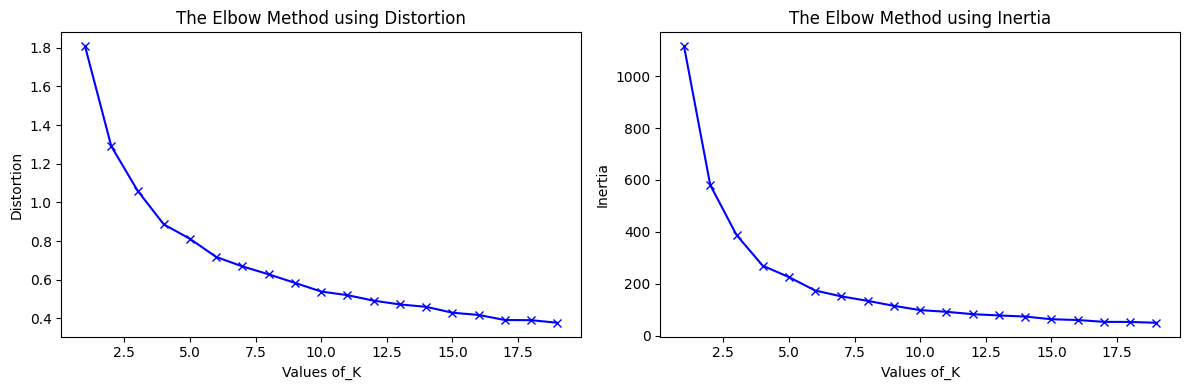

In [202]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # Adjust figsize as needed

# Plot the first plot on ax1
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('Values of_K')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method using Distortion')


# Plot the second plot on ax2
ax2.plot(K, inertias, 'bx-')
ax2.set_xlabel('Values of_K')
ax2.set_ylabel('Inertia')
ax2.set_title('The Elbow Method using Inertia')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

Define the number of clusters for the clustering method combining the result of the graphs and the value of variable optimal_num_clusters

## KMeans clustering

In [203]:
# Step 4: Perform final clustering
final_kmeans = KMeans(n_clusters=5, random_state=0) # random_state fixed to 0, n_cluster changed
final_cluster_labels = final_kmeans.fit_predict(X)

# Save the result of clustering with random state 0 as a dataframe column
emb_1['label'] = final_cluster_labels  

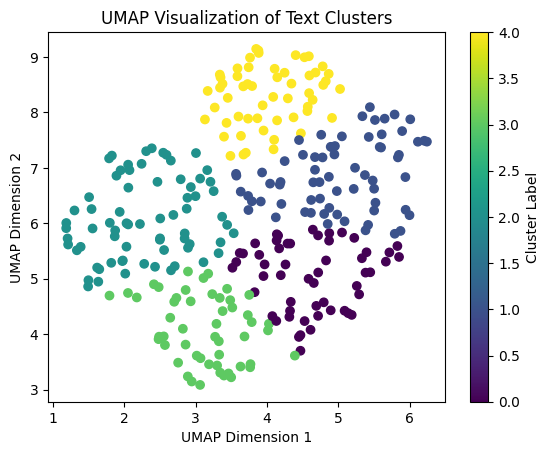

In [204]:
# Visualize clustering depending on different random states.
figures = [] # list to hold different figures. 

fig1, ax1 = plt.subplots()
scatter = ax1.scatter(X[:, 0], X[:, 1], c=final_cluster_labels, cmap='viridis')
ax1.set_xlabel('UMAP Dimension 1')
ax1.set_ylabel('UMAP Dimension 2')
ax1.set_title('UMAP Visualization of Text Clusters')

colorbar = plt.colorbar(scatter, ax=ax1)
colorbar.set_label('Cluster Label')

figures.append(fig1)

In [205]:
# Cluster labels obtained from clustering algorithm

final_cluster_labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 1\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 1"

Silhouette Coefficient: 0.3648640215396881
Calinski-Harabasz Index: 292.9823085600748
Davies-Bouldin Index: 0.8646740255523415


### Question 2
"How could we improve gender equality at work?"

In [206]:
# convert list to numpy array to make an input to embeddings
emb_2['q2'] = emb_2['q2'].apply(np.array)  
matrix = np.vstack(emb_2['q2'].values)
matrix.shape

(298, 1536)

In [207]:
X = matrix.copy()

## Dimensionality reduction (umap)

In [208]:
# Step 1: Normalize the data
from sklearn.preprocessing import StandardScaler
normalized_embeddings = StandardScaler().fit_transform(X)

In [209]:
# Step 2: Apply UMAP for dimensionality reduction
umap_model = UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state = 42)
umap_embeddings = umap_model.fit_transform(normalized_embeddings)
X = umap_embeddings.copy()

In [210]:
# Step 3: Use silhouette score to find optimal number of clusters
silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

The last line derives from the fact that silhouette score is calculated from the num_cluster 2, so therefore if retrieving index of the lists, the first element's index is 0 but it indicates the value of num_cluster 2, therefore +2 would make it easier to retrieve the value. 


In [211]:
optimal_num_clusters

4

In [212]:
# Use Elbow-analysis as well to find optimal number of clusters
# Elbow analysis
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(np.sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = np.sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

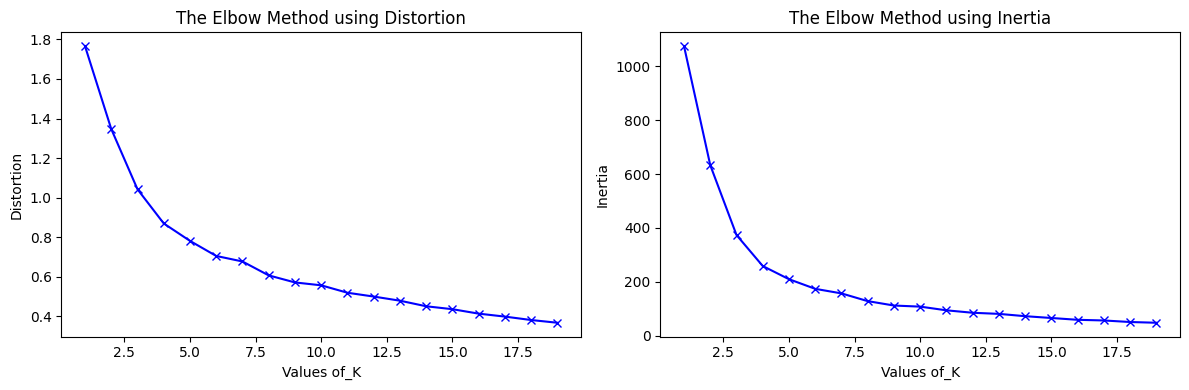

In [213]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # Adjust figsize as needed

# Plot the first plot on ax1
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('Values of_K')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method using Distortion')


# Plot the second plot on ax2
ax2.plot(K, inertias, 'bx-')
ax2.set_xlabel('Values of_K')
ax2.set_ylabel('Inertia')
ax2.set_title('The Elbow Method using Inertia')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

Define the number of clusters for the clustering method combining the result of the graphs and the value of variable optimal_num_clusters

## KMeans clustering

In [214]:
# Step 4: Perform final clustering
final_kmeans = KMeans(n_clusters=4, random_state=0) # random_state fixed to 0, n_cluster changed
final_cluster_labels = final_kmeans.fit_predict(X)

# Save the result of clustering with random state 0 as a dataframe column
emb_2['label'] = final_cluster_labels  

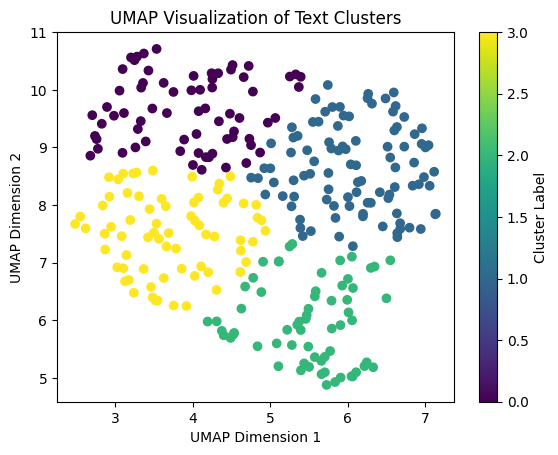

In [215]:
# Visualize clustering depending on different random states.
figures = [] # list to hold different figures. 

fig1, ax1 = plt.subplots()
scatter = ax1.scatter(X[:, 0], X[:, 1], c=final_cluster_labels, cmap='viridis')
ax1.set_xlabel('UMAP Dimension 1')
ax1.set_ylabel('UMAP Dimension 2')
ax1.set_title('UMAP Visualization of Text Clusters')

colorbar = plt.colorbar(scatter, ax=ax1)
colorbar.set_label('Cluster Label')

figures.append(fig1)

In [216]:
# Cluster labels obtained from clustering algorithm

final_cluster_labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 2\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 2"

Silhouette Coefficient: 0.4187977910041809
Calinski-Harabasz Index: 309.96020648532783
Davies-Bouldin Index: 0.7743237727693237


### Question 3
"How could we prevent the extinction of the elephant?"

In [217]:
# convert list to numpy array to make an input to embeddings
emb_3['q3'] = emb_3['q3'].apply(np.array)  
matrix = np.vstack(emb_3['q3'].values)
matrix.shape

(299, 1536)

In [218]:
X = matrix.copy()

## Dimensionality reduction (umap)

In [219]:
# Step 1: Normalize the data
from sklearn.preprocessing import StandardScaler
normalized_embeddings = StandardScaler().fit_transform(X)

In [220]:
# Step 2: Apply UMAP for dimensionality reduction
umap_model = UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state = 42)
umap_embeddings = umap_model.fit_transform(normalized_embeddings)
X = umap_embeddings.copy()

In [221]:
# Step 3: Use silhouette score to find optimal number of clusters
silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

The last line derives from the fact that silhouette score is calculated from the num_cluster 2, so therefore if retrieving index of the lists, the first element's index is 0 but it indicates the value of num_cluster 2, therefore +2 would make it easier to retrieve the value. 


In [222]:
optimal_num_clusters

2

In [223]:
# Use Elbow-analysis as well to find optimal number of clusters
# Elbow analysis
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(np.sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = np.sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

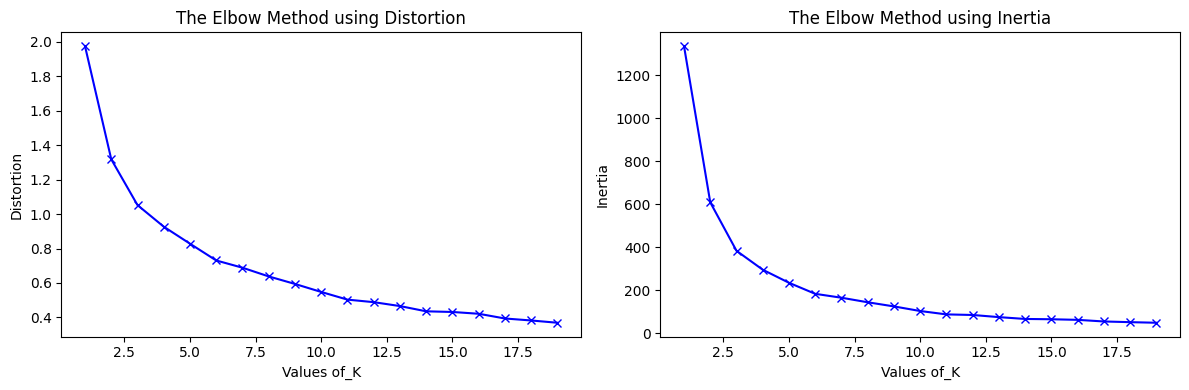

In [224]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # Adjust figsize as needed

# Plot the first plot on ax1
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('Values of_K')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method using Distortion')


# Plot the second plot on ax2
ax2.plot(K, inertias, 'bx-')
ax2.set_xlabel('Values of_K')
ax2.set_ylabel('Inertia')
ax2.set_title('The Elbow Method using Inertia')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

Define the number of clusters for the clustering method combining the result of the graphs and the value of variable optimal_num_clusters

## KMeans clustering

In [225]:
# Step 4: Perform final clustering
final_kmeans = KMeans(n_clusters=4, random_state=0) # random_state fixed to 0, n_cluster changed
final_cluster_labels = final_kmeans.fit_predict(X)

# Save the result of clustering with random state 0 as a dataframe column
emb_3['label'] = final_cluster_labels  

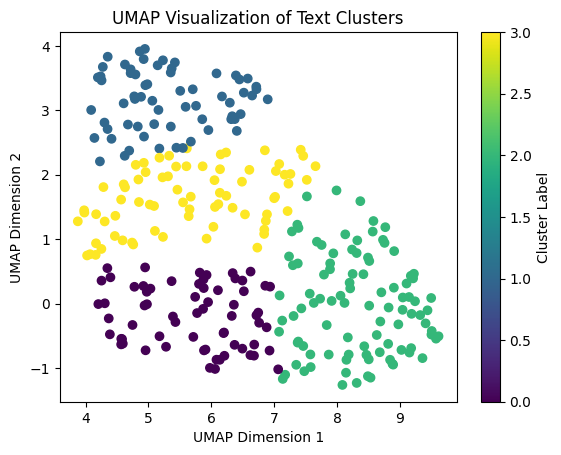

In [226]:
# Visualize clustering depending on different random states.
figures = [] # list to hold different figures. 

fig1, ax1 = plt.subplots()
scatter = ax1.scatter(X[:, 0], X[:, 1], c=final_cluster_labels, cmap='viridis')
ax1.set_xlabel('UMAP Dimension 1')
ax1.set_ylabel('UMAP Dimension 2')
ax1.set_title('UMAP Visualization of Text Clusters')

colorbar = plt.colorbar(scatter, ax=ax1)
colorbar.set_label('Cluster Label')

figures.append(fig1)

In [227]:
# Cluster labels obtained from clustering algorithm

final_cluster_labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 3\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 3"

Silhouette Coefficient: 0.3769693076610565
Calinski-Harabasz Index: 314.45299131521193
Davies-Bouldin Index: 1.0603526498356466


### Question 4
"How could we increase the use of public transport?"

In [228]:
# convert list to numpy array to make an input to embeddings
emb_4['q4'] = emb_4['q4'].apply(np.array)  
matrix = np.vstack(emb_4['q4'].values)
matrix.shape

(296, 1536)

In [229]:
X = matrix.copy()

## Dimensionality reduction (umap)

In [230]:
# Step 1: Normalize the data
from sklearn.preprocessing import StandardScaler
normalized_embeddings = StandardScaler().fit_transform(X)

In [231]:
# Step 2: Apply UMAP for dimensionality reduction
umap_model = UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state = 42)
umap_embeddings = umap_model.fit_transform(normalized_embeddings)
X = umap_embeddings.copy()

In [232]:
# Step 3: Use silhouette score to find optimal number of clusters
silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

The last line derives from the fact that silhouette score is calculated from the num_cluster 2, so therefore if retrieving index of the lists, the first element's index is 0 but it indicates the value of num_cluster 2, therefore +2 would make it easier to retrieve the value. 


In [233]:
optimal_num_clusters

2

In [234]:
# Use Elbow-analysis as well to find optimal number of clusters
# Elbow analysis
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(np.sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = np.sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

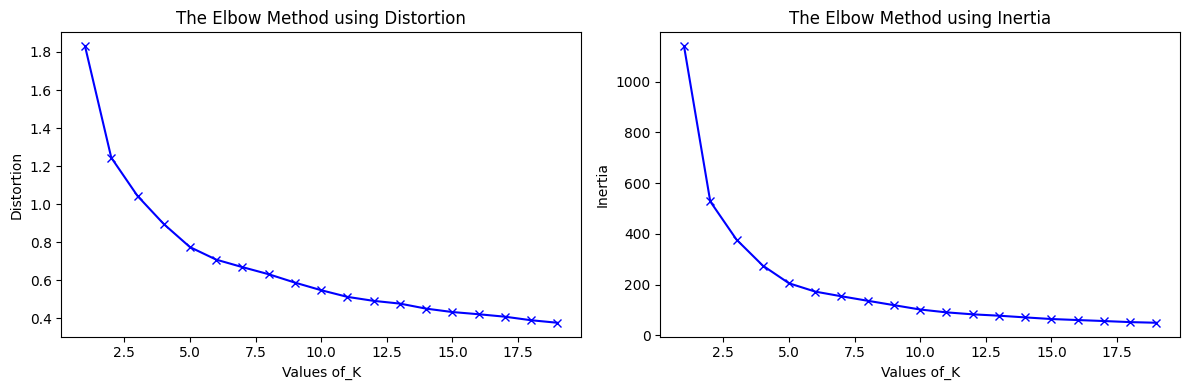

In [235]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # Adjust figsize as needed

# Plot the first plot on ax1
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('Values of_K')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method using Distortion')


# Plot the second plot on ax2
ax2.plot(K, inertias, 'bx-')
ax2.set_xlabel('Values of_K')
ax2.set_ylabel('Inertia')
ax2.set_title('The Elbow Method using Inertia')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

Define the number of clusters for the clustering method combining the result of the graphs and the value of variable optimal_num_clusters

## KMeans clustering

In [236]:
# Step 4: Perform final clustering
final_kmeans = KMeans(n_clusters=3, random_state=0) # random_state fixed to 0, n_cluster changed
final_cluster_labels = final_kmeans.fit_predict(X)

# Save the result of clustering with random state 0 as a dataframe column
emb_4['label'] = final_cluster_labels  

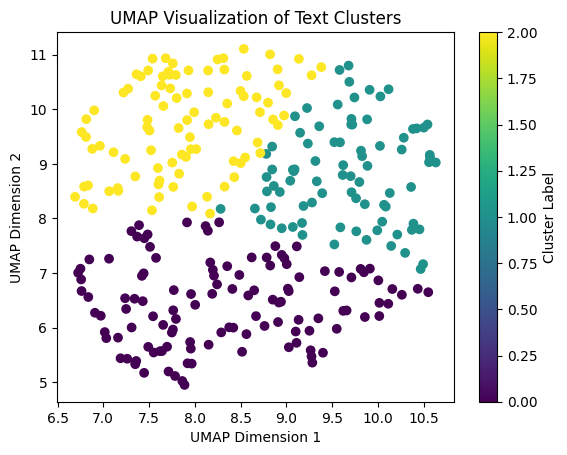

In [237]:
# Visualize clustering depending on different random states.
figures = [] # list to hold different figures. 

fig1, ax1 = plt.subplots()
scatter = ax1.scatter(X[:, 0], X[:, 1], c=final_cluster_labels, cmap='viridis')
ax1.set_xlabel('UMAP Dimension 1')
ax1.set_ylabel('UMAP Dimension 2')
ax1.set_title('UMAP Visualization of Text Clusters')

colorbar = plt.colorbar(scatter, ax=ax1)
colorbar.set_label('Cluster Label')

figures.append(fig1)

In [238]:
# Cluster labels obtained from clustering algorithm

final_cluster_labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 4\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 4"

Silhouette Coefficient: 0.39489492774009705
Calinski-Harabasz Index: 296.15461716204834
Davies-Bouldin Index: 0.9186011227290845


### Question 5
"How could we reduce stress in our society?"

In [239]:
# convert list to numpy array to make an input to embeddings
emb_5['q5'] = emb_5['q5'].apply(np.array)  
matrix = np.vstack(emb_5['q5'].values)
matrix.shape

(298, 1536)

In [240]:
X = matrix.copy()

## Dimensionality reduction (umap)

In [241]:
# Step 1: Normalize the data
from sklearn.preprocessing import StandardScaler
normalized_embeddings = StandardScaler().fit_transform(X)

In [242]:
# Step 2: Apply UMAP for dimensionality reduction
umap_model = UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state = 42)
umap_embeddings = umap_model.fit_transform(normalized_embeddings)
X = umap_embeddings.copy()

In [243]:
# Step 3: Use silhouette score to find optimal number of clusters
silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

The last line derives from the fact that silhouette score is calculated from the num_cluster 2, so therefore if retrieving index of the lists, the first element's index is 0 but it indicates the value of num_cluster 2, therefore +2 would make it easier to retrieve the value. 


In [244]:
optimal_num_clusters

2

In [245]:
# Use Elbow-analysis as well to find optimal number of clusters
# Elbow analysis
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(np.sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = np.sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

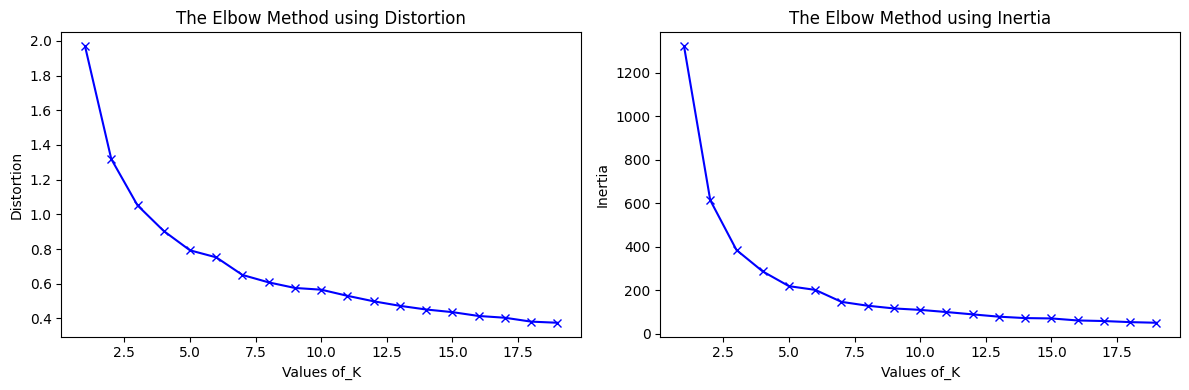

In [246]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # Adjust figsize as needed

# Plot the first plot on ax1
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('Values of_K')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method using Distortion')


# Plot the second plot on ax2
ax2.plot(K, inertias, 'bx-')
ax2.set_xlabel('Values of_K')
ax2.set_ylabel('Inertia')
ax2.set_title('The Elbow Method using Inertia')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

Define the number of clusters for the clustering method combining the result of the graphs and the value of variable optimal_num_clusters

## KMeans clustering

In [247]:
# Step 4: Perform final clustering
final_kmeans = KMeans(n_clusters=3, random_state=0) # random_state fixed to 0, n_cluster changed
final_cluster_labels = final_kmeans.fit_predict(X)

# Save the result of clustering with random state 0 as a dataframe column
emb_5['label'] = final_cluster_labels  

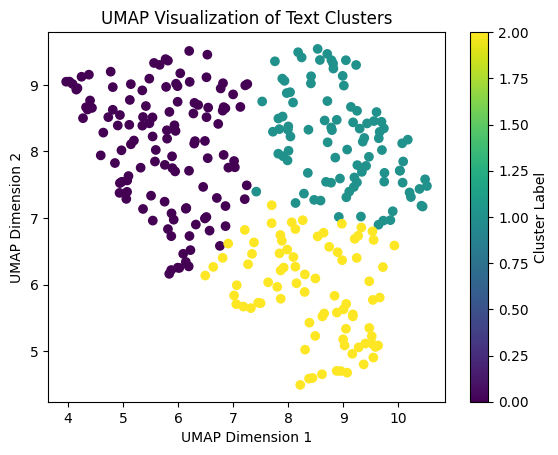

In [248]:
# Visualize clustering depending on different random states.
figures = [] # list to hold different figures. 

fig1, ax1 = plt.subplots()
scatter = ax1.scatter(X[:, 0], X[:, 1], c=final_cluster_labels, cmap='viridis')
ax1.set_xlabel('UMAP Dimension 1')
ax1.set_ylabel('UMAP Dimension 2')
ax1.set_title('UMAP Visualization of Text Clusters')

colorbar = plt.colorbar(scatter, ax=ax1)
colorbar.set_label('Cluster Label')

figures.append(fig1)

In [249]:
# Cluster labels obtained from clustering algorithm

final_cluster_labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 5\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 5"

Silhouette Coefficient: 0.45281919836997986
Calinski-Harabasz Index: 360.04731120145965
Davies-Bouldin Index: 0.8030313886210658


**Result of clustering doesn't seem promising.**
* Data: participants, aggregation with 'average'
1. The clusters are sparse in between.
2. Silhouette score is not improved with UMAP which is different from the previous analysis.

**Improvement**
1. Change the data
    1. Aggregation of embeddings from "average" to "sum"?
    2. Missing rows 

## Analysis across the questions

In [250]:
# rename the column for the aggregation result
emb_1 = emb_1.rename(columns = {'average_emb': 'q1'})
emb_2 = emb_2.rename(columns = {'average_emb': 'q2'})
emb_3 = emb_3.rename(columns = {'average_emb': 'q3'})
emb_4 = emb_4.rename(columns = {'average_emb': 'q4'})
emb_5 = emb_5.rename(columns = {'average_emb': 'q5'})

In [251]:
emb_1

,index,q1,label
0,00278,"[-0.005889835837297142, -0.009542102622799576,...",4
1,0068d,"[0.003777626669034362, -0.012327757489401847, ...",3
2,00f13,"[0.006576948426663875, -0.006745201829471625, ...",1
3,01cb6,"[-0.00841952059417963, -0.0018921643495559692,...",0
4,02670,"[0.002078799856826663, -0.009245264250785113, ...",1
...,...,...,...
293,f92a4,"[0.00642041489481926, -0.0028216063510626554, ...",2
294,f9fd8,"[7.58664682507515e-05, -0.0070783721283078195,...",3
295,fb2a2,"[0.001085693435743451, -0.01368370740674436, 0...",2
296,fb9c4,"[-0.0008086141606327146, -0.012582524112076499...",1


In [252]:
embs = pd.concat([emb_1.set_index('index'), 
                  emb_2.set_index('index'), 
                  emb_3.set_index('index'), 
                  emb_4.set_index('index'), 
                  emb_5.set_index('index')], 
                  axis = 1, join = 'inner')
embs

,q1,label,q2,label,q3,label,q4,label,q5,label
index,,,,,,,,,,
00278,"[-0.005889835837297142, -0.009542102622799576,...",4,"[0.018360418500378728, -0.002182999183423817, ...",3,"[0.0332301177084446, -0.006154693500138819, 0....",3,"[0.0004080481012351811, -0.011651088786311447,...",0,"[-3.136955201625824e-05, -0.002964372839778662...",1
0068d,"[0.003777626669034362, -0.012327757489401847, ...",3,"[0.016658554039895534, -0.0019388766027987002,...",1,"[0.007977996673434972, -0.00596900274977088, 0...",0,"[2.680858597159386e-06, -0.01144798770546913, ...",0,"[0.008172442112118006, -0.01627891818061471, 0...",1
00f13,"[0.006576948426663875, -0.006745201829471625, ...",1,"[0.007894962839782239, 0.0004629830829799175, ...",2,"[0.020078461361117662, -0.005783047853037715, ...",0,"[-0.003675657045096159, -0.021395855769515037,...",0,"[-0.00871523879468441, -0.007124244584701955, ...",0
01cb6,"[-0.00841952059417963, -0.0018921643495559692,...",0,"[-0.0004256693413481116, -0.007454204128589481...",0,"[0.006293872185051441, -0.011424508318305016, ...",1,"[-0.0022251540794968605, -0.020568439550697804...",0,"[0.009880984714254738, -0.0002244877745397389,...",2
02670,"[0.002078799856826663, -0.009245264250785113, ...",1,"[0.011121974349953235, -0.0039071359671652315,...",2,"[0.026000117883086205, -0.019202710408717395, ...",2,"[0.0031834173714742064, -0.02549003027379513, ...",0,"[0.007850443548522889, -0.011988058264250867, ...",0
...,...,...,...,...,...,...,...,...,...,...
f92a4,"[0.00642041489481926, -0.0028216063510626554, ...",2,"[0.009595928402268328, -0.0106578569393605, 0....",0,"[0.013248009723611176, -0.004685296065872535, ...",3,"[0.005926267825998366, -0.021341128274798393, ...",2,"[-0.004023674502968788, -0.005383056029677391,...",0
f9fd8,"[7.58664682507515e-05, -0.0070783721283078195,...",3,"[0.008225396120299896, 0.009615814313292503, 0...",1,"[0.01667756005190313, -0.009036897169426083, 0...",1,"[0.015343445399776102, -0.01279020207002759, 0...",2,"[0.015763904759660365, -0.009844007878564298, ...",0
fb2a2,"[0.001085693435743451, -0.01368370740674436, 0...",2,"[0.007290905651946862, -0.002142022286231319, ...",1,"[0.021046903886599466, -0.002681880840100348, ...",3,"[0.001942130015231669, -0.004107240319717676, ...",0,"[-0.0020119027234613896, -0.013733156223315746...",1


## Losing indices 
Why only 291 left? Because the dataframes miss different participants. So it gets reduced to more than the maximum missing number of each dataframe.

### Flatten the vector across the questions

In [253]:
embs_flat = embs.apply(lambda x: np.mean(x, axis=0), axis=1)

In [254]:
embs_flat

index
00278    [1.1046077378920747, 1.0967504743067544, 1.117...
0068d    [0.5036589300353079, 0.49520374572719444, 0.51...
00f13    [0.3022159476787783, 0.2959414633046254, 0.321...
01cb6    [0.3005104512884281, 0.29584361958783123, 0.32...
02670    [0.5050234753009863, 0.4930166800835286, 0.519...
                               ...                        
f92a4    [0.7031166946343728, 0.6955111056339229, 0.719...
f9fd8    [0.7056086172799891, 0.6970866335066968, 0.726...
fb2a2    [0.7029353730266059, 0.6963651992923892, 0.719...
fb9c4    [0.9033417798922164, 0.8936795300751694, 0.922...
ff2bf    [0.5034048521328562, 0.49283993668504983, 0.52...
Length: 290, dtype: object

In [255]:
# convert list to numpy array to make an input to embeddings
embs_flat = embs_flat.apply(np.array)  
matrix = np.vstack(embs_flat.values)
matrix.shape

(290, 1536)

In [256]:
X = matrix.copy()

## Dimensionality reduction (umap)

In [257]:
# Step 1: Normalize the data
from sklearn.preprocessing import StandardScaler
normalized_embeddings = StandardScaler().fit_transform(X)

In [258]:
# Step 2: Apply UMAP for dimensionality reduction
umap_model = UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state = 42)
umap_embeddings = umap_model.fit_transform(normalized_embeddings)
X = umap_embeddings.copy()

In [259]:
# Step 3: Use silhouette score to find optimal number of clusters
silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

The last line derives from the fact that silhouette score is calculated from the num_cluster 2, so therefore if retrieving index of the lists, the first element's index is 0 but it indicates the value of num_cluster 2, therefore +2 would make it easier to retrieve the value. 


In [260]:
optimal_num_clusters

10

In [261]:
# Use Elbow-analysis as well to find optimal number of clusters
# Elbow analysis
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(np.sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = np.sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

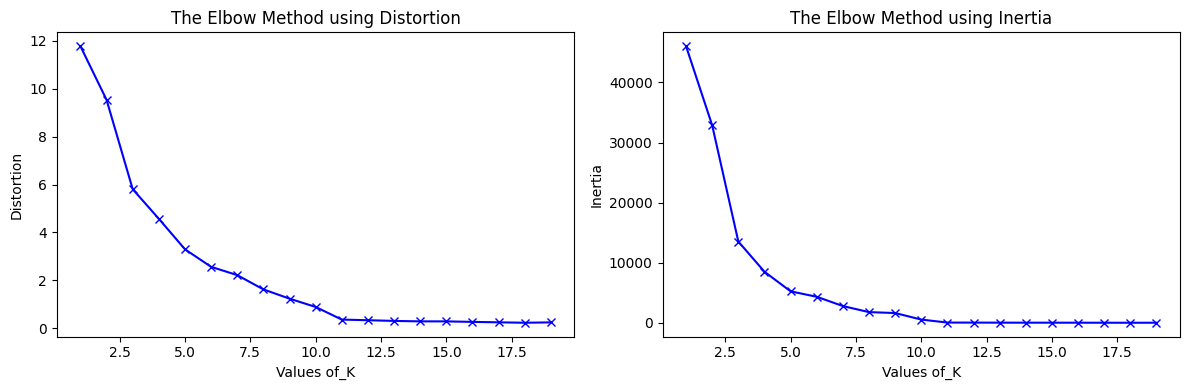

In [262]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # Adjust figsize as needed

# Plot the first plot on ax1
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('Values of_K')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method using Distortion')


# Plot the second plot on ax2
ax2.plot(K, inertias, 'bx-')
ax2.set_xlabel('Values of_K')
ax2.set_ylabel('Inertia')
ax2.set_title('The Elbow Method using Inertia')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

Define the number of clusters for the clustering method combining the result of the graphs and the value of variable optimal_num_clusters

## KMeans clustering

In [354]:
# Step 4: Perform final clustering
final_kmeans = KMeans(n_clusters=10, random_state=0) # random_state fixed to 0, n_cluster changed
final_cluster_labels = final_kmeans.fit_predict(X)

# Save the result of clustering with random state 0 as a dataframe column
embs_flat['label'] = final_cluster_labels  

In [355]:
embs_flat

index
00278    [1.1046077378920747, 1.0967504743067544, 1.117...
0068d    [0.5036589300353079, 0.49520374572719444, 0.51...
00f13    [0.3022159476787783, 0.2959414633046254, 0.321...
01cb6    [0.3005104512884281, 0.29584361958783123, 0.32...
02670    [0.5050234753009863, 0.4930166800835286, 0.519...
                               ...                        
f9fd8    [0.7056086172799891, 0.6970866335066968, 0.726...
fb2a2    [0.7029353730266059, 0.6963651992923892, 0.719...
fb9c4    [0.9033417798922164, 0.8936795300751694, 0.922...
ff2bf    [0.5034048521328562, 0.49283993668504983, 0.52...
label    [1, 1, 6, 6, 1, 3, 2, 2, 5, 8, 1, 4, 7, 4, 4, ...
Length: 291, dtype: object

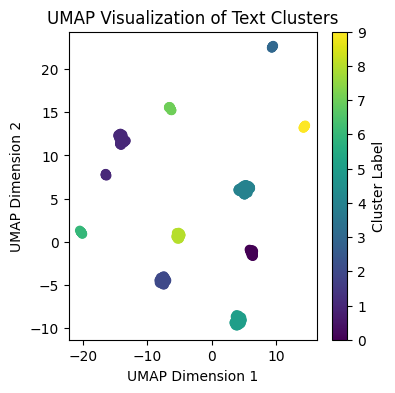

In [356]:
# Visualize clustering depending on different random states.
figures = [] # list to hold different figures. 

fig1, ax1 = plt.subplots()
scatter = ax1.scatter(X[:, 0], X[:, 1], c=final_cluster_labels, cmap='viridis')
ax1.set_xlabel('UMAP Dimension 1')
ax1.set_ylabel('UMAP Dimension 2')
ax1.set_title('UMAP Visualization of Text Clusters')

colorbar = plt.colorbar(scatter, ax=ax1)
colorbar.set_label('Cluster Label')

figures.append(fig1)

In [357]:
# Cluster labels obtained from clustering algorithm

final_cluster_labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Across the questions\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Across the questions"

Silhouette Coefficient: 0.8985360860824585
Calinski-Harabasz Index: 5681.373615264201
Davies-Bouldin Index: 0.12180183759797499


**Result of the analysis across the questions**
* Data: vector flattened with mean
1. Clustering not successful, sparse between.

**Improvement**
1. Use different flattening method or change the approach 

## DataFrame about each participant_id and cluster_label by question

### Participants and cluster labels

In [267]:
embs

,q1,label,q2,label,q3,label,q4,label,q5,label
index,,,,,,,,,,
00278,"[-0.005889835837297142, -0.009542102622799576,...",4,"[0.018360418500378728, -0.002182999183423817, ...",3,"[0.0332301177084446, -0.006154693500138819, 0....",3,"[0.0004080481012351811, -0.011651088786311447,...",0,"[-3.136955201625824e-05, -0.002964372839778662...",1
0068d,"[0.003777626669034362, -0.012327757489401847, ...",3,"[0.016658554039895534, -0.0019388766027987002,...",1,"[0.007977996673434972, -0.00596900274977088, 0...",0,"[2.680858597159386e-06, -0.01144798770546913, ...",0,"[0.008172442112118006, -0.01627891818061471, 0...",1
00f13,"[0.006576948426663875, -0.006745201829471625, ...",1,"[0.007894962839782239, 0.0004629830829799175, ...",2,"[0.020078461361117662, -0.005783047853037715, ...",0,"[-0.003675657045096159, -0.021395855769515037,...",0,"[-0.00871523879468441, -0.007124244584701955, ...",0
01cb6,"[-0.00841952059417963, -0.0018921643495559692,...",0,"[-0.0004256693413481116, -0.007454204128589481...",0,"[0.006293872185051441, -0.011424508318305016, ...",1,"[-0.0022251540794968605, -0.020568439550697804...",0,"[0.009880984714254738, -0.0002244877745397389,...",2
02670,"[0.002078799856826663, -0.009245264250785113, ...",1,"[0.011121974349953235, -0.0039071359671652315,...",2,"[0.026000117883086205, -0.019202710408717395, ...",2,"[0.0031834173714742064, -0.02549003027379513, ...",0,"[0.007850443548522889, -0.011988058264250867, ...",0
...,...,...,...,...,...,...,...,...,...,...
f92a4,"[0.00642041489481926, -0.0028216063510626554, ...",2,"[0.009595928402268328, -0.0106578569393605, 0....",0,"[0.013248009723611176, -0.004685296065872535, ...",3,"[0.005926267825998366, -0.021341128274798393, ...",2,"[-0.004023674502968788, -0.005383056029677391,...",0
f9fd8,"[7.58664682507515e-05, -0.0070783721283078195,...",3,"[0.008225396120299896, 0.009615814313292503, 0...",1,"[0.01667756005190313, -0.009036897169426083, 0...",1,"[0.015343445399776102, -0.01279020207002759, 0...",2,"[0.015763904759660365, -0.009844007878564298, ...",0
fb2a2,"[0.001085693435743451, -0.01368370740674436, 0...",2,"[0.007290905651946862, -0.002142022286231319, ...",1,"[0.021046903886599466, -0.002681880840100348, ...",3,"[0.001942130015231669, -0.004107240319717676, ...",0,"[-0.0020119027234613896, -0.013733156223315746...",1


In [268]:
# rename the column, drop unnecessary columns
embs.columns = ['q1_emb', 'q1', 'q2_emb', 'q2', 'q3_emb', 'q3', 'q4_emb', 'q4', 'q5_emb', 'q5']
embs = embs.drop(['q1_emb', 'q2_emb', 'q3_emb', 'q4_emb', 'q5_emb'], axis = 1)
embs

,q1,q2,q3,q4,q5
index,,,,,
00278,4,3,3,0,1
0068d,3,1,0,0,1
00f13,1,2,0,0,0
01cb6,0,0,1,0,2
02670,1,2,2,0,0
...,...,...,...,...,...
f92a4,2,0,3,2,0
f9fd8,3,1,1,2,0
fb2a2,2,1,3,0,1


In [269]:
sorted(embs.index.to_list())

['00278',
 '0068d',
 '00f13',
 '01cb6',
 '02670',
 '06419',
 '07089',
 '08238',
 '0a0eb',
 '0ac65',
 '0af61',
 '0b262',
 '0b71e',
 '0b883',
 '0e30c',
 '0fd67',
 '10cc3',
 '11a01',
 '131d3',
 '137f6',
 '1404b',
 '14834',
 '153d4',
 '15c99',
 '17104',
 '172e0',
 '17f9b',
 '18214',
 '190b7',
 '1a0d4',
 '1a21a',
 '1cf47',
 '1dc24',
 '1e1f3',
 '1ff0f',
 '21dd5',
 '229d0',
 '24214',
 '24841',
 '24f1f',
 '25801',
 '25cce',
 '26afc',
 '27522',
 '288d4',
 '2a86f',
 '2af8a',
 '2b811',
 '2fb73',
 '317b1',
 '319cd',
 '33787',
 '33b03',
 '34ed3',
 '36024',
 '365a9',
 '374dd',
 '39ab4',
 '3a726',
 '3ac86',
 '3d321',
 '3d77c',
 '3dc2d',
 '3e5da',
 '40c25',
 '41d13',
 '43eef',
 '444a6',
 '445d8',
 '4526a',
 '46206',
 '49fbe',
 '4a2a8',
 '4a2f6',
 '4a7ae',
 '4aa4b',
 '4ab1b',
 '4b69a',
 '4b8e1',
 '4d77f',
 '4e2b9',
 '4f430',
 '501eb',
 '50cd8',
 '5134f',
 '517f2',
 '5242b',
 '52c8b',
 '53f0b',
 '55126',
 '55220',
 '55280',
 '5652a',
 '57684',
 '578b8',
 '57f16',
 '58297',
 '58914',
 '59cd3',
 '5a7b5',


The dataframe shows the cluster label that the participant possesses for each question. 

In [270]:
# Save the dataframe to csv file
import os 
os.makedirs('/mnt/home/kim/knowledge-explore/data/perception', exist_ok=True)
embs.to_csv('~/knowledge-explore/data/perception/participants_and_questions.csv')  

### Adjacency matrix

In [271]:
# Function to create an adjacency matrix
import numpy as np 
import pandas as pd

def create_adjacency_matrix(df):
    num_participants = len(df.index)
    adjacency_matrix = np.zeros((num_participants, num_participants), dtype=int)

    for i, participant1 in enumerate(df.index):
        for j, participant2 in enumerate(df.index):
            common_clusters = (df.loc[participant1] == df.loc[participant2]).sum()
            adjacency_matrix[i, j] = common_clusters

    return pd.DataFrame(adjacency_matrix, index=df.index, columns=df.index)

adjacency_matrix = create_adjacency_matrix(embs)
print(adjacency_matrix)

index  00278  0068d  00f13  01cb6  02670  06419  07089  08238  0a0eb  0ac65  \
index                                                                         
00278      5      2      1      1      1      1      3      1      0      2   
0068d      2      5      2      1      1      2      4      2      1      1   
00f13      1      2      5      1      4      2      1      0      1      1   
01cb6      1      1      1      5      1      3      1      0      1      2   
02670      1      1      4      1      5      2      1      1      1      2   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
f92a4      1      0      1      1      1      1      1      2      3      1   
f9fd8      0      2      1      1      1      3      2      2      4      0   
fb2a2      3      3      1      1      1      2      4      3      2      2   
fb9c4      0      0      2      1      3      0      0      2      1      2   
ff2bf      0      0      1      1      2      1     

In [272]:
# Save the adjancency matrix to the csv file.
adjacency_matrix.to_csv('~/knowledge-explore/data/perception/adjacency_matrix.csv')  

### NetworkX - adjacency matrix to graph -> "on hold"

In [273]:
import networkx as nx

In [274]:
ad = pd.read_csv('~/knowledge-explore/data/perception/adjacency_matrix.csv', index_col = 0)

In [275]:
ad

,00278,0068d,00f13,01cb6,02670,06419,07089,08238,0a0eb,0ac65,...,f4bc7,f4fb5,f6145,f8e64,f9101,f92a4,f9fd8,fb2a2,fb9c4,ff2bf
index,,,,,,,,,,,,,,,,,,,,,
00278,5,2,1,1,1,1,3,1,0,2,...,2,4,3,1,0,1,0,3,0,0
0068d,2,5,2,1,1,2,4,2,1,1,...,0,2,2,2,1,0,2,3,0,0
00f13,1,2,5,1,4,2,1,0,1,1,...,0,2,2,3,0,1,1,1,2,1
01cb6,1,1,1,5,1,3,1,0,1,2,...,1,1,2,2,2,1,1,1,1,1
02670,1,1,4,1,5,2,1,1,1,2,...,1,2,2,2,1,1,1,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f92a4,1,0,1,1,1,1,1,2,3,1,...,1,1,1,1,0,5,2,2,1,3
f9fd8,0,2,1,1,1,3,2,2,4,0,...,1,0,0,0,1,2,5,1,1,1
fb2a2,3,3,1,1,1,2,4,3,2,2,...,0,3,3,2,1,2,1,5,0,1


In [276]:
G = nx.Graph()

for row, col in ad.iterrows():
    for node, weight in col.items():
        if weight != 0:
            G.add_edge(row, node, weight=weight)


In [277]:
# pos = nx.kamada_kawai_layout(G)  # Position nodes using a spring layout (you can choose other layout methods)

# nx.draw(G, pos, with_labels=True, node_size=10, node_color='skyblue', font_size=5, font_color='black', font_weight='bold')

# edge_labels = {(edge[0], edge[1]): edge[2]['weight'] for edge in G.edges(data=True)}

# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=5)

# plt.title("Your Graph")
# plt.show()


## Detect Communities
### Louvain method

The Louvain method for community detection is a method to extract non-overlapping communities from large networks. The method is a greedy optimization method that appears to run in time O(n * log n) where n is the number of nodes in the network.

In [278]:
import community # This is python-louvain library
from networkx.algorithms.community import greedy_modularity_communities

In [279]:
G = nx.Graph(adjacency_matrix)

partition = nx.community.louvain_communities(G, seed = 0) # setting the random_state to 0 to deter it changes in repetition

# Create a dictionary with the value of empty list. 
keys = [i for i in range(len(partition))]
communities = {key: [] for key in keys}

num = 0
for part in partition:
    communities[num] = part
    num += 1

In [280]:
communities

{0: {'00278',
  '0068d',
  '07089',
  '08238',
  '0af61',
  '0b71e',
  '0b883',
  '0e30c',
  '11a01',
  '14834',
  '1e1f3',
  '24841',
  '27522',
  '2a86f',
  '2af8a',
  '33787',
  '34ed3',
  '374dd',
  '3a726',
  '3d321',
  '3d77c',
  '444a6',
  '46206',
  '4a2a8',
  '4a7ae',
  '4ab1b',
  '4d77f',
  '4f430',
  '52c8b',
  '53f0b',
  '58297',
  '61b49',
  '6296b',
  '68cb9',
  '6a1d7',
  '6b10c',
  '6b271',
  '6d6e0',
  '6ee1d',
  '70af7',
  '72074',
  '73573',
  '80734',
  '80c7b',
  '8293c',
  '84c88',
  '883da',
  '88936',
  '90058',
  '906b3',
  '90b9c',
  '91ba1',
  '9427e',
  '95fa5',
  '96ce4',
  '9d46f',
  '9da7b',
  '9eeaf',
  'a020a',
  'a05fb',
  'a5762',
  'a7aa9',
  'a9d8d',
  'ad5fb',
  'b34ba',
  'b4066',
  'ba744',
  'bc046',
  'bcc54',
  'be034',
  'beefd',
  'bf1b6',
  'bf6a6',
  'c10be',
  'c2954',
  'c7c37',
  'c8cb6',
  'ca64a',
  'd2302',
  'd2686',
  'd3fb8',
  'd9152',
  'df547',
  'e0223',
  'e2525',
  'e98a2',
  'ebe1e',
  'f4fb5',
  'f6145',
  'fb2a2'},
 1: {'

In [281]:
len(communities[0])

90

In [282]:
len(communities[1])

119

In [283]:
len(communities[2])

81

### Idea community detection

1) Plot the histogram of the demographic traits for each community and visually compare them 
2) Calculate the median of the numerical variables

### Variable interpretation
Refer to the file from the gitlab 'Variable_coding'

https://arc-git.mpib-berlin.mpg.de/poltools/knowledge_exploration/study_1/-/blob/dev/Variable_coding?ref_type=heads

### Demographic variables calling

In [284]:
# call the original data again
df = pd.read_csv('~/knowledge-explore/data/processed_data/reference_dataset_v1.csv')

In [285]:
df = df.rename(columns = {'participant_id': 'PARTICIPANT_ID'})
df = df.set_index('PARTICIPANT_ID')

In [286]:
demos = df[['AGE', 'GENDER', 'EDUCATION', 'EMPLOYMENT', 'INCOME', 'POLITICAL', 'DAT', 'CRT2']]

In [287]:
# Check for duplicate indices
duplicates = demos.index.duplicated()

# keep only the first occurrence of each participant_id (remove duplicates)
demos.drop_duplicates(keep='first', inplace=True)

# Display the modified DataFrame
print("\nDataFrame with unique participant_id:")
print(demos)


DataFrame with unique participant_id:
                AGE  GENDER  EDUCATION  EMPLOYMENT  INCOME  POLITICAL  \
PARTICIPANT_ID                                                          
00278            24       1          5           1       3          2   
0068d            74       1          2           7       2          4   
00f13            43       1          4           1       3          3   
01cb6            56       3          2           8       1          1   
02670            25       1          5           1       2          2   
...             ...     ...        ...         ...     ...        ...   
f92a4            35       1          5           1       3          3   
f9fd8            50       1          4           8       2          2   
fb2a2            38       1          2           8       1          3   
fb9c4            21       1          4           8       3          2   
ff2bf            67       1          2           7       2          4   

           

/tmp/ipykernel_1294025/256376826.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demos.drop_duplicates(keep='first', inplace=True)


### Age

In [288]:
age = demos['AGE']

In [289]:
# delete the null valued rows in the column 'age'
age = age.dropna()

In [290]:
# mean, var, std
print("mean of age:", np.mean(age))
print("variance of age:", np.var(age))
print("standard deviation of age:", np.std(age))

mean of age: 45.86666666666667
variance of age: 244.02888888888884
standard deviation of age: 15.621424035243678


In [291]:
# Dataframe age with each communities
age_0 = age.loc[list(communities[0])]
age_1 = age.loc[list(communities[1])]
age_2 = age.loc[list(communities[2])]

# print cardinality, mean, var, std within the cluster.
# community_0
print("*community_0 in age")
print("how many:", len(age_0))
print("mean:", np.mean(age_0))
print("variance:", np.var(age_0))
print("std:", np.std(age_0))

# community_1
print("\n*community_1 in age ")
print("how many:", len(age_1))
print("mean:", np.mean(age_1))
print("variance:", np.var(age_1))
print("std:", np.std(age_1))

# community_2
print("\n*community_2 in age ")
print("how many:", len(age_2))
print("mean:", np.mean(age_2))
print("variance:", np.var(age_2))
print("std:", np.std(age_2))


*community_0 in age
how many: 90
mean: 45.022222222222226
variance: 238.48839506172845
std: 15.443069483160674

*community_1 in age 
how many: 119
mean: 44.865546218487395
variance: 254.88948520584708
std: 15.965258695237202

*community_2 in age 
how many: 81
mean: 48.39506172839506
variance: 219.17725956409086
std: 14.804636421205718


(array([3., 2., 6., 7., 1., 4., 0., 5., 2., 1., 3., 7., 6., 2., 0., 3., 1.,
        5., 2., 3., 2., 3., 5., 6., 0., 3., 3., 1., 1., 3.]),
 array([20. , 21.8, 23.6, 25.4, 27.2, 29. , 30.8, 32.6, 34.4, 36.2, 38. ,
        39.8, 41.6, 43.4, 45.2, 47. , 48.8, 50.6, 52.4, 54.2, 56. , 57.8,
        59.6, 61.4, 63.2, 65. , 66.8, 68.6, 70.4, 72.2, 74. ]),
 <BarContainer object of 30 artists>)

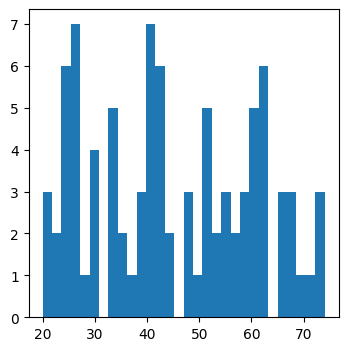

In [292]:
# it is the example below, use to see another community as well.
# Histogram of age in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(age_0, bins = 30)

### Gender

In [293]:
gender = demos['GENDER']
gender = gender.dropna()
gender

PARTICIPANT_ID
00278    1
0068d    1
00f13    1
01cb6    3
02670    1
        ..
f92a4    1
f9fd8    1
fb2a2    1
fb9c4    1
ff2bf    1
Name: GENDER, Length: 300, dtype: int64

In [294]:
# Dataframe gender with each communities
gender_0 = gender.loc[list(communities[0])]
gender_1 = gender.loc[list(communities[1])]
gender_2 = gender.loc[list(communities[2])]

print("How many in gender belong to community 0:", len(gender_0))
print("How many in gender belong to community 1:", len(gender_1))
print("How many in gender belong to community 2:", len(gender_2))

How many in gender belong to community 0: 90
How many in gender belong to community 1: 119
How many in gender belong to community 2: 81


(array([43.,  0.,  0.,  0.,  0.,  0.,  0., 47.]),
 array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ]),
 <BarContainer object of 8 artists>)

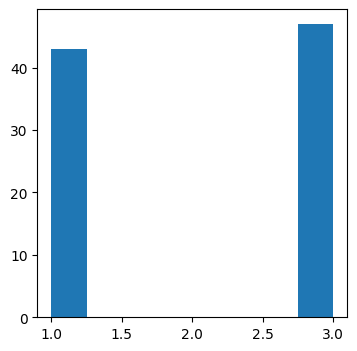

In [295]:
# it is the example below, use to see another community as well.
# Histogram of gender in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(gender_0, bins = 8)

### Ideology political

In [296]:
politics = demos['POLITICAL']
politics = politics.dropna()
politics

PARTICIPANT_ID
00278    2
0068d    4
00f13    3
01cb6    1
02670    2
        ..
f92a4    3
f9fd8    2
fb2a2    3
fb9c4    2
ff2bf    4
Name: POLITICAL, Length: 300, dtype: int64

In [297]:
# Dataframe political ideology with each communities
politics_0 = politics.loc[list(communities[0])]
politics_1 = politics.loc[list(communities[1])]
politics_2 = politics.loc[list(communities[2])]

print("How many in politics belong to community 0:", len(politics_0))
print("How many in politics belong to community 1:", len(politics_1))
print("How many in politics belong to community 2:", len(politics_2))

How many in politics belong to community 0: 90
How many in politics belong to community 1: 119
How many in politics belong to community 2: 81


(array([10.,  0., 40.,  0.,  0., 31.,  0.,  9.]),
 array([1.   , 1.375, 1.75 , 2.125, 2.5  , 2.875, 3.25 , 3.625, 4.   ]),
 <BarContainer object of 8 artists>)

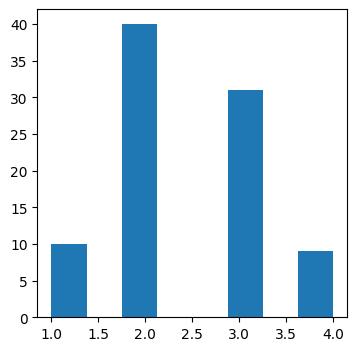

In [298]:
# it is the example below, use to see another community as well.
# Histogram of politics in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(politics_0, bins = 8)

### Education 

In [299]:
demos.columns.tolist()

['AGE',
 'GENDER',
 'EDUCATION',
 'EMPLOYMENT',
 'INCOME',
 'POLITICAL',
 'DAT',
 'CRT2']

In [300]:
education = demos['EDUCATION']

In [301]:
education = education.dropna()
education

PARTICIPANT_ID
00278    5
0068d    2
00f13    4
01cb6    2
02670    5
        ..
f92a4    5
f9fd8    4
fb2a2    2
fb9c4    4
ff2bf    2
Name: EDUCATION, Length: 300, dtype: int64

In [302]:
# Dataframe political ideology with each communities
education_0 = education.loc[list(communities[0])]
education_1 = education.loc[list(communities[1])]
education_2 = education.loc[list(communities[2])]

print("How many in education belong to community 0:", len(education_0))
print("How many in education belong to community 1:", len(education_1))
print("How many in education belong to community 2:", len(education_2))


How many in education belong to community 0: 90
How many in education belong to community 1: 119
How many in education belong to community 2: 81


(array([23.,  0., 17.,  0., 28.,  0., 21.,  1.]),
 array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 8 artists>)

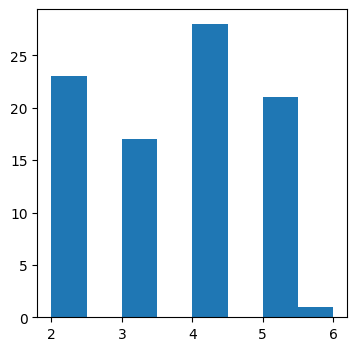

In [303]:
# it is the example below, use to see another community as well.
# Histogram of education in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(education_0, bins = 8)

### Employment

In [304]:
demos['EMPLOYMENT']

PARTICIPANT_ID
00278    1
0068d    7
00f13    1
01cb6    8
02670    1
        ..
f92a4    1
f9fd8    8
fb2a2    8
fb9c4    8
ff2bf    7
Name: EMPLOYMENT, Length: 300, dtype: int64

In [305]:
employment = demos['EMPLOYMENT'].dropna()
employment

PARTICIPANT_ID
00278    1
0068d    7
00f13    1
01cb6    8
02670    1
        ..
f92a4    1
f9fd8    8
fb2a2    8
fb9c4    8
ff2bf    7
Name: EMPLOYMENT, Length: 300, dtype: int64

In [306]:
# Dataframe political ideology with each communities
employment_0 = employment.loc[list(communities[0])]
employment_1 = employment.loc[list(communities[1])]
employment_2 = employment.loc[list(communities[2])]

print("How many in employment belong to community 0:", len(employment_0))
print("How many in employment belong to community 1:", len(employment_1))
print("How many in employment belong to community 2:", len(employment_2))


How many in employment belong to community 0: 90
How many in employment belong to community 1: 119
How many in employment belong to community 2: 81


(array([32., 12.,  7.,  0., 11.,  4.,  0.,  5., 12.,  7.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

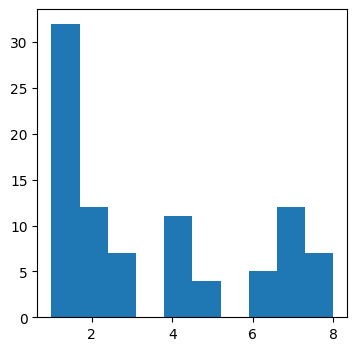

In [307]:
# it is the example below, use to see another community as well.
# Histogram of employment in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(employment_0, bins = 10)

### Income

In [308]:
income = demos['INCOME'].dropna()

In [309]:
# Dataframe political ideology with each communities
income_0 = income.loc[list(communities[0])]
income_1 = income.loc[list(communities[1])]
income_2 = income.loc[list(communities[2])]

print("How many in income belong to community 0:", len(income_0))
print("How many in income belong to community 1:", len(income_1))
print("How many in income belong to community 2:", len(income_2))


How many in income belong to community 0: 90
How many in income belong to community 1: 119
How many in income belong to community 2: 81


(array([26.,  0., 33.,  0., 16.,  0., 10.,  5.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 8 artists>)

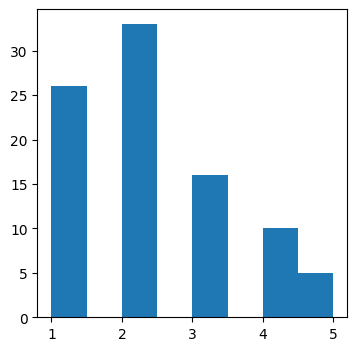

In [310]:
# it is the example below, use to see another community as well.
# Histogram of income in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(income_0, bins = 8)

### DAT - how divergent the participant can think

In [311]:
dat = demos['DAT'].dropna()

In [312]:
# Dataframe political ideology with each communities
dat_0 = dat.loc[list(communities[0])]
dat_1 = dat.loc[list(communities[1])]
dat_2 = dat.loc[list(communities[2])]

print("How many in DAT belong to community 0:", len(dat_0))
print("How many in DAT belong to community 1:", len(dat_1))
print("How many in DAT belong to community 2:", len(dat_2))


How many in DAT belong to community 0: 90
How many in DAT belong to community 1: 119
How many in DAT belong to community 2: 81


(array([ 1.,  0.,  0.,  0.,  0.,  6., 48., 35.]),
 array([ 0.        , 11.52713248, 23.05426496, 34.58139744, 46.10852993,
        57.63566241, 69.16279489, 80.68992737, 92.21705985]),
 <BarContainer object of 8 artists>)

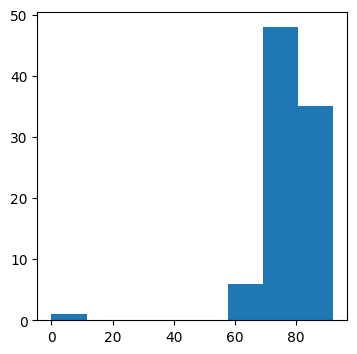

In [313]:
# it is the example below, use to see another community as well.
# Histogram of DAT in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(dat_0, bins = 8)

### CRT - how creative the participant can think

In [314]:
crt = demos['CRT2'].dropna()

In [315]:
# Dataframe political ideology with each communities
crt_0 = crt.loc[list(communities[0])]
crt_1 = crt.loc[list(communities[1])]
crt_2 = crt.loc[list(communities[2])]

print("How many in CRT belong to community 0:", len(crt_0))
print("How many in CRT belong to community 1:", len(crt_1))
print("How many in CRT belong to community 2:", len(crt_2))


How many in CRT belong to community 0: 90
How many in CRT belong to community 1: 119
How many in CRT belong to community 2: 81


(array([ 6.,  0.,  8.,  0., 22.,  0., 31., 23.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 <BarContainer object of 8 artists>)

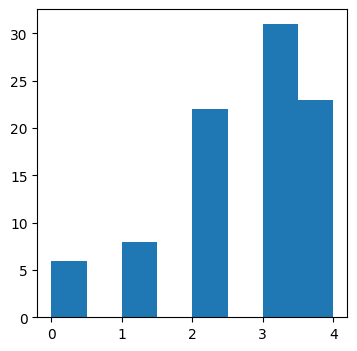

In [316]:
# it is the example below, use to see another community as well.
# Histogram of CRT in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(crt_0, bins = 8)

## Visualize multiple graph

In [317]:
# Display graphs grouped by the community label
import matplotlib.pyplot as plt

# List of data for each plot
data_0 = [age_0, gender_0, education_0, employment_0, income_0, politics_0, dat_0, crt_0]
data_1 = [age_1, gender_1, education_1, employment_1, income_1, politics_1, dat_1, crt_1]
data_2 = [age_2, gender_2, education_2, employment_2, income_2, politics_2, dat_2, crt_2]

### Community 0



*The number of the community members: 90


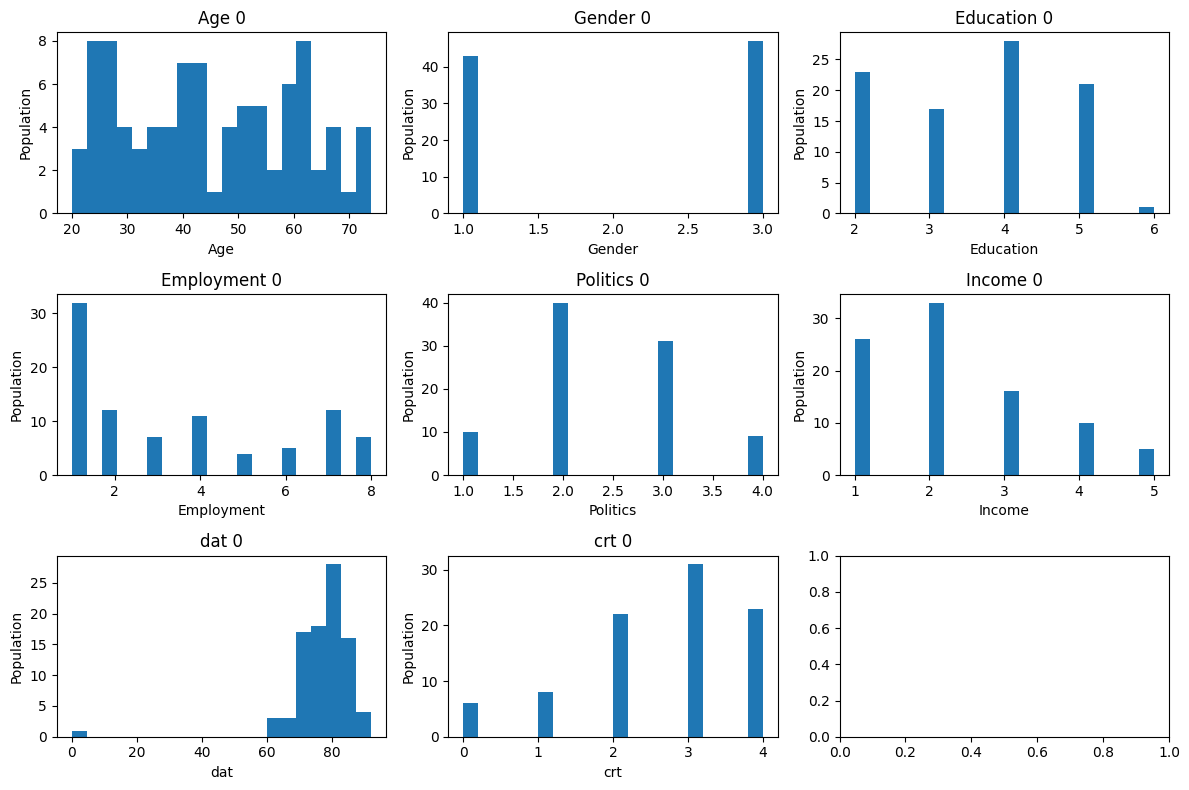

In [318]:
# Create subplots dynamically
fig, axes = plt.subplots(3, 3,  figsize=(12, 8))


# Create a histogram on one of the subplots
axes[0, 0].hist(age_0, bins=20)
axes[0, 0].set_title('Age 0')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[0, 1].hist(gender_0, bins=20)
axes[0, 1].set_title('Gender 0')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[0, 2].hist(education_0, bins=20)
axes[0, 2].set_title('Education 0')
axes[0, 2].set_xlabel('Education')
axes[0, 2].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 0].hist(employment_0, bins=20)
axes[1, 0].set_title('Employment 0')
axes[1, 0].set_xlabel('Employment')
axes[1, 0].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 1].hist(politics_0, bins=20)
axes[1, 1].set_title('Politics 0')
axes[1, 1].set_xlabel('Politics')
axes[1, 1].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 2].hist(income_0, bins=20)
axes[1, 2].set_title('Income 0')
axes[1, 2].set_xlabel('Income')
axes[1, 2].set_ylabel('Population')


# Create a histogram on one of the subplots
axes[2, 0].hist(dat_0, bins=20)
axes[2, 0].set_title('dat 0')
axes[2, 0].set_xlabel('dat')
axes[2, 0].set_ylabel('Population')


# Create a histogram on one of the subplots
axes[2, 1].hist(crt_0, bins=20)
axes[2, 1].set_title('crt 0')
axes[2, 1].set_xlabel('crt')
axes[2, 1].set_ylabel('Population')

# Adjust layout
plt.tight_layout()

# Print the number of the community members:
print("\n\n*The number of the community members:", len(communities[0]))

# Show the combined plots
plt.show()


* gender: Binary results shown
* dat0: Left - skewed

### community 1



*The number of the community members: 119


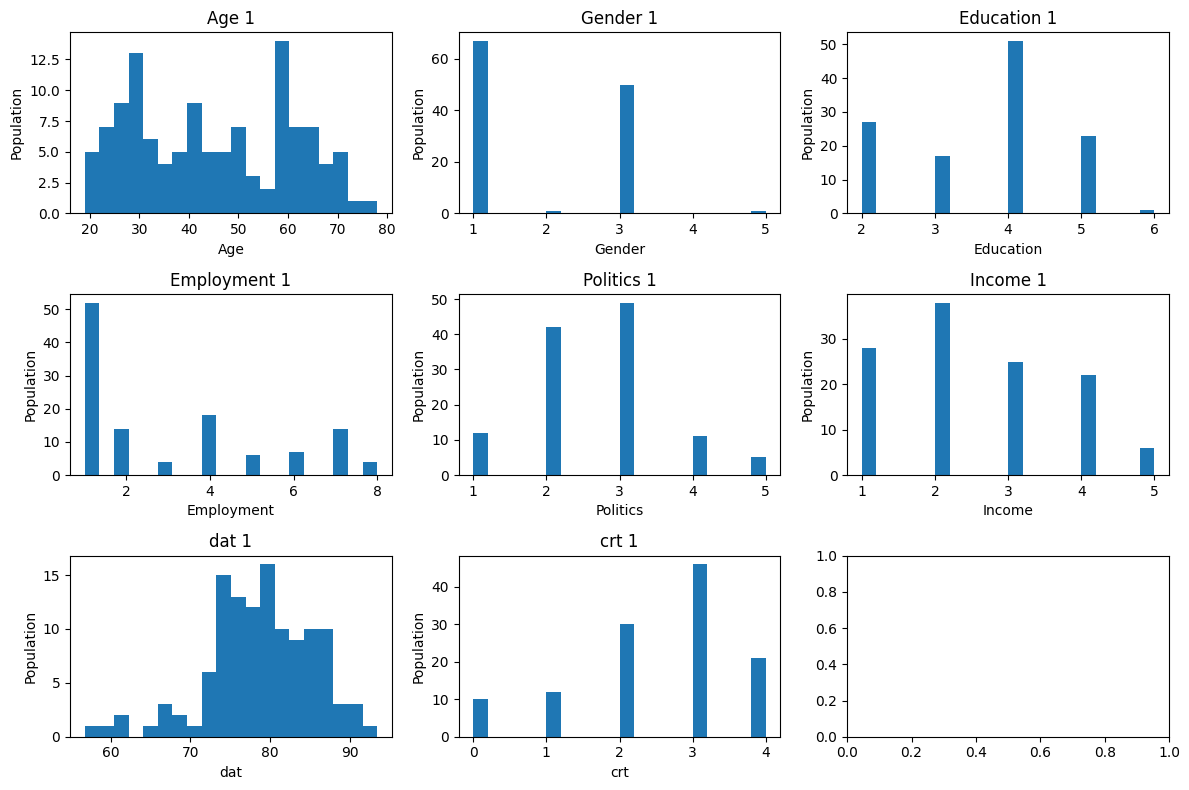

In [319]:
# Create subplots dynamically
fig, axes = plt.subplots(3, 3,  figsize=(12, 8))


# Create a histogram on one of the subplots
axes[0, 0].hist(age_1, bins=20)
axes[0, 0].set_title('Age 1')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[0, 1].hist(gender_1, bins=20)
axes[0, 1].set_title('Gender 1')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[0, 2].hist(education_1, bins=20)
axes[0, 2].set_title('Education 1')
axes[0, 2].set_xlabel('Education')
axes[0, 2].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 0].hist(employment_1, bins=20)
axes[1, 0].set_title('Employment 1')
axes[1, 0].set_xlabel('Employment')
axes[1, 0].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 1].hist(politics_1, bins=20)
axes[1, 1].set_title('Politics 1')
axes[1, 1].set_xlabel('Politics')
axes[1, 1].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 2].hist(income_1, bins=20)
axes[1, 2].set_title('Income 1')
axes[1, 2].set_xlabel('Income')
axes[1, 2].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[2, 0].hist(dat_1, bins=20)
axes[2, 0].set_title('dat 1')
axes[2, 0].set_xlabel('dat')
axes[2, 0].set_ylabel('Population')


# Create a histogram on one of the subplots
axes[2, 1].hist(crt_1, bins=20)
axes[2, 1].set_title('crt 1')
axes[2, 1].set_xlabel('crt')
axes[2, 1].set_ylabel('Population')

# Adjust layout
plt.tight_layout()

# Print the number of the community members:
print("\n\n*The number of the community members:", len(communities[1]))

# Show the combined plots
plt.show()


* dat1: compared to the community 0, it is more evenly distributed. 

### community 2



*The number of the community members: 81


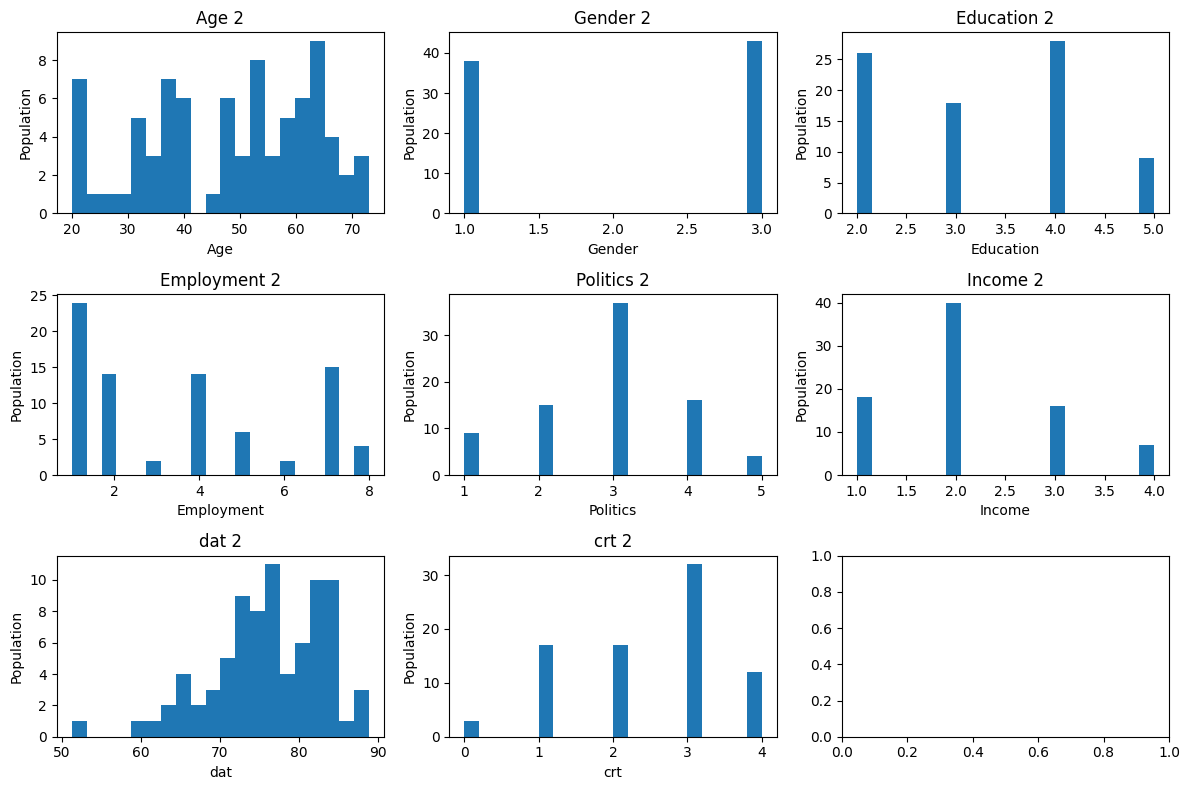

In [320]:
# Create subplots dynamically
fig, axes = plt.subplots(3, 3,  figsize=(12, 8))


# Create a histogram on one of the subplots
axes[0, 0].hist(age_2, bins=20)
axes[0, 0].set_title('Age 2')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[0, 1].hist(gender_2, bins=20)
axes[0, 1].set_title('Gender 2')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[0, 2].hist(education_2, bins=20)
axes[0, 2].set_title('Education 2')
axes[0, 2].set_xlabel('Education')
axes[0, 2].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 0].hist(employment_2, bins=20)
axes[1, 0].set_title('Employment 2')
axes[1, 0].set_xlabel('Employment')
axes[1, 0].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 1].hist(politics_2, bins=20)
axes[1, 1].set_title('Politics 2')
axes[1, 1].set_xlabel('Politics')
axes[1, 1].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 2].hist(income_2, bins=20)
axes[1, 2].set_title('Income 2')
axes[1, 2].set_xlabel('Income')
axes[1, 2].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[2, 0].hist(dat_2, bins=20)
axes[2, 0].set_title('dat 2')
axes[2, 0].set_xlabel('dat')
axes[2, 0].set_ylabel('Population')


# Create a histogram on one of the subplots
axes[2, 1].hist(crt_2, bins=20)
axes[2, 1].set_title('crt 2')
axes[2, 1].set_xlabel('crt')
axes[2, 1].set_ylabel('Population')

# Adjust layout
plt.tight_layout()

# Print the number of the community members:
print("\n\n*The number of the community members:", len(communities[2]))

# Show the combined plots
plt.show()


* **REFsource** : interpreting the clustering results.

https://developers.google.com/machine-learning/clustering/interpret


### ANOVA for the continuous variable
Assumptions: ANOVA assumes homogeneity of variances (similar variances in groups), normal distribution of residuals, and independence of observations.

check if the data are approximately normally distributed within each cluster and if the variances across clusters are roughly equal.

**age**

In [321]:
# print cardinality, mean, var, std within the cluster.
# community_0
print("*community_0 in age")
print("how many:", len(age_0))
print("mean:", np.mean(age_0))
print("variance:", np.var(age_0))
print("std:", np.std(age_0))

# community_1
print("\n*community_1 in age ")
print("how many:", len(age_1))
print("mean:", np.mean(age_1))
print("variance:", np.var(age_1))
print("std:", np.std(age_1))

# community_2
print("\n*community_2 in age ")
print("how many:", len(age_2))
print("mean:", np.mean(age_2))
print("variance:", np.var(age_2))
print("std:", np.std(age_2))

*community_0 in age
how many: 90
mean: 45.022222222222226
variance: 238.48839506172845
std: 15.443069483160674

*community_1 in age 
how many: 119
mean: 44.865546218487395
variance: 254.88948520584708
std: 15.965258695237202

*community_2 in age 
how many: 81
mean: 48.39506172839506
variance: 219.17725956409086
std: 14.804636421205718


* ANOVA requires homogeneous variance -> Levene's test for the verification.

**DAT**

In [322]:
# print cardinality, mean, var, std within the cluster.
# community_0
print("*community_0 in dat")
print("how many:", len(dat_0))
print("mean:", np.mean(dat_0))
print("variance:", np.var(dat_0))
print("std:", np.std(dat_0))

# community_1
print("\n*community_1 in dat ")
print("how many:", len(dat_1))
print("mean:", np.mean(dat_1))
print("variance:", np.var(dat_1))
print("std:", np.std(dat_1))

# community_2
print("\n*community_2 in dat ")
print("how many:", len(dat_2))
print("mean:", np.mean(dat_2))
print("variance:", np.var(dat_2))
print("std:", np.std(dat_2))

*community_0 in dat
how many: 90
mean: 77.20210969673836
variance: 108.75464184406174
std: 10.428549364320128

*community_1 in dat 
how many: 119
mean: 78.7667178897409
variance: 44.900997930046515
std: 6.700820690784563

*community_2 in dat 
how many: 81
mean: 76.24617279630411
variance: 51.17923789497634
std: 7.153966584698054


**CRT**

In [323]:
# print cardinality, mean, var, std within the cluster.
# community_0
print("*community_0 in crt")
print("how many:", len(crt_0))
print("mean:", np.mean(crt_0))
print("variance:", np.var(crt_0))
print("std:", np.std(crt_0))

# community_1
print("\n*community_1 in crt ")
print("how many:", len(crt_1))
print("mean:", np.mean(crt_1))
print("variance:", np.var(crt_1))
print("std:", np.std(crt_1))

# community_2
print("\n*community_2 in crt ")
print("how many:", len(crt_2))
print("mean:", np.mean(crt_2))
print("variance:", np.var(crt_2))
print("std:", np.std(crt_2))

*community_0 in crt
how many: 90
mean: 2.6333333333333333
variance: 1.3211111111111111
std: 1.149395976637778

*community_1 in crt 
how many: 119
mean: 2.4705882352941178
variance: 1.3079584775086504
std: 1.1436601232484458

*community_2 in crt 
how many: 81
mean: 2.4074074074074074
variance: 1.1796982167352539
std: 1.0861391332307542


### Levene's test

In [324]:
import scipy.stats as stats

In [325]:
# Age

# Assuming you have your data in separate groups
age_0
age_1
age_2

# Perform Levene's test
statistic, p_value = stats.levene(age_0, age_1, age_2)

# Print the results
print("Levene's Test Statistic:", statistic)
print("P-value:", p_value)

# Check the p-value against the significance level (commonly 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis. There is evidence of unequal variances.")
else:
    print("Fail to reject the null hypothesis. Variances are likely homogeneous.")


Levene's Test Statistic: 0.763561290292165
P-value: 0.4669481669907699
Fail to reject the null hypothesis. Variances are likely homogeneous.


In [326]:
# dat

# Assuming you have your data in separate groups
dat_0
dat_1
dat_2

# Perform Levene's test
statistic, p_value = stats.levene(dat_0, dat_1, dat_2)

# Print the results
print("Levene's Test Statistic:", statistic)
print("P-value:", p_value)

# Check the p-value against the significance level (commonly 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis. There is evidence of unequal variances.")
else:
    print("Fail to reject the null hypothesis. Variances are likely homogeneous.")


Levene's Test Statistic: 0.5954018161762549
P-value: 0.5520205423182288
Fail to reject the null hypothesis. Variances are likely homogeneous.


In [327]:
# crt

# Assuming you have your data in separate groups
crt_0
crt_1
crt_2

# Perform Levene's test
statistic, p_value = stats.levene(crt_0, crt_1, crt_2)

# Print the results
print("Levene's Test Statistic:", statistic)
print("P-value:", p_value)

# Check the p-value against the significance level (commonly 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis. There is evidence of unequal variances.")
else:
    print("Fail to reject the null hypothesis. Variances are likely homogeneous.")


Levene's Test Statistic: 0.003486237052540972
P-value: 0.9965198750160024
Fail to reject the null hypothesis. Variances are likely homogeneous.


In [328]:
# It is suitable for the ANOVA

In [329]:
from scipy.stats import f_oneway

# Confidence level has been set initially 0.95, therefore p < 0.05 is able to reject the null hypothesis. 
# null-hypothesis: the groups do not have significantly different means

In [330]:
# Age
# Group the data by cluster label and extract the continuous feature
grouped_data = [age_0, age_1, age_2]

# Perform ANOVA
f_statistic, p_value = f_oneway(*grouped_data)

# Print the p-value
print("ANOVA test p-value:", p_value)


ANOVA test p-value: 0.23716537917278685


p is not below 0.05 -> fail reject the null-hypothesis

In [331]:
# dat
# Group the data by cluster label and extract the continuous feature
grouped_data = [dat_0, dat_1, dat_2]

# Perform ANOVA
f_statistic, p_value = f_oneway(*grouped_data)

# Print the p-value
print("ANOVA test p-value:", p_value)


ANOVA test p-value: 0.09109334883055248


p is not below 0.05 -> fail to reject the null-hypothesis

In [332]:
# crt
# Group the data by cluster label and extract the continuous feature
grouped_data = [crt_0, crt_1, crt_2]

# Perform ANOVA
f_statistic, p_value = f_oneway(*grouped_data)

# Print the p-value
print("ANOVA test p-value:", p_value)


ANOVA test p-value: 0.39644696909326116


p is not below 0.05 -> fail to reject the null-hypothesis

**Result:**
There's no significant difference in the means of the continuous feature across different clusters.

### Chi-square test for categorical variable
- one variable: feature, the other one: label

In [333]:
# Create a dataframe with participants id and their community label
label_0 = pd.DataFrame(data= [0 for i in range(len(communities[0]))], index = list(communities[0]))
label_1 = pd.DataFrame(data= [1 for i in range(len(communities[1]))], index = list(communities[1]))
label_2 = pd.DataFrame(data= [2 for i in range(len(communities[2]))], index = list(communities[2]))

In [334]:
print(len(label_0), len(label_1), len(label_2))

90 119 81


In [335]:
label_0 = label_0.reset_index()
label_1 = label_1.reset_index()
label_2 = label_2.reset_index()

In [336]:
print(len(label_0), len(label_1), len(label_2))

90 119 81


In [337]:
# check if the above cell is coherent with the result of this cell.
print(len(communities[0]), len(communities[1]), len(communities[2]))

90 119 81


In [338]:
labels = pd.concat([label_0, label_1, label_2], axis = 0, ignore_index = True)
labels = labels.rename(columns = { 0 : 'label'})

**calculate expected frequencies**

In [339]:
# Sort the column 'index' into alphabetical order
labels = labels.sort_values(by='index')
labels = labels.reset_index()
labels = labels[['index', 'label']]

In [340]:
# Sort the dataframe into alphabetical order
gender = gender.reset_index()
gender = gender.sort_values(by = 'PARTICIPANT_ID')

politics = politics.reset_index()
politics = politics.sort_values(by = 'PARTICIPANT_ID')

education = education.reset_index()
education = education.sort_values(by = 'PARTICIPANT_ID')

employment = employment.reset_index()
employment = employment.sort_values(by = 'PARTICIPANT_ID')

income = income.reset_index()
income = income.sort_values(by = 'PARTICIPANT_ID')

In [341]:
# Only selects the participants that also remains in the labels' participant_id info.
gender = gender[gender['PARTICIPANT_ID'].isin(labels['index'])].reset_index()
gender = gender[['PARTICIPANT_ID', 'GENDER']]

politics = politics[politics['PARTICIPANT_ID'].isin(labels['index'])].reset_index()
politics = politics[['PARTICIPANT_ID', 'POLITICAL']]

education = education[education['PARTICIPANT_ID'].isin(labels['index'])].reset_index()
education = education[['PARTICIPANT_ID', 'EDUCATION']]

employment = employment[employment['PARTICIPANT_ID'].isin(labels['index'])].reset_index()
employment = employment[['PARTICIPANT_ID', 'EMPLOYMENT']]

income = income[income['PARTICIPANT_ID'].isin(labels['index'])].reset_index()
income = income[['PARTICIPANT_ID', 'INCOME']]

In [342]:
# check if the order of the particpant column is identical to the label column - gender
cnt = 0
for i in range(len(labels)): 
    if gender['PARTICIPANT_ID'].loc[i] == labels['index'].loc[i]: 
        pass
    else:
        cnt += 1
print("gender - not identical:", cnt)

gender - not identical: 0


In [343]:
# check if the order of the particpant column is identical to the label column - politics
cnt = 0
for i in range(len(labels)): 
    if politics['PARTICIPANT_ID'].loc[i] == labels['index'].loc[i]: 
        pass
    else:
        cnt += 1
print("politics - not identical:", cnt)

politics - not identical: 0


In [344]:
# check if the order of the particpant column is identical to the label column - education
cnt = 0
for i in range(len(labels)): 
    if education['PARTICIPANT_ID'].loc[i] == labels['index'].loc[i]: 
        pass
    else:
        cnt += 1
print("education - not identical:", cnt)

education - not identical: 0


In [345]:
# check if the order of the particpant column is identical to the label column - employment
cnt = 0
for i in range(len(labels)): 
    if employment['PARTICIPANT_ID'].loc[i] == labels['index'].loc[i]: 
        pass
    else:
        cnt += 1
print("employment - not identical:", cnt)

employment - not identical: 0


In [346]:
# check if the order of the particpant column is identical to the label column - income
cnt = 0
for i in range(len(labels)): 
    if income['PARTICIPANT_ID'].loc[i] == labels['index'].loc[i]: 
        pass
    else:
        cnt += 1
print("income - not identical:", cnt)

income - not identical: 0


In [347]:
from scipy.stats import chi2_contingency

In [348]:
labels

,index,label
0,00278,0
1,0068d,0
2,00f13,1
3,01cb6,2
4,02670,1
...,...,...
285,f92a4,1
286,f9fd8,1
287,fb2a2,0
288,fb9c4,2


In [349]:
# Create a contingency table
contingency_table = pd.crosstab(gender['GENDER'], labels['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print("gender, Chi-squared test p-value:", p)


gender, Chi-squared test p-value: 0.4668432036914354


p is not below 0.05 -> fail to reject the null-hypothesis

**Result:**
The distribution of the feature(gender) is **not** significantly different across different clusters.

In [350]:
# Create a contingency table
contingency_table = pd.crosstab(politics['POLITICAL'], labels['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print("politics, Chi-squared test p-value:", p)

politics, Chi-squared test p-value: 0.013603915727733677


p is not below 0.05 -> fail to reject the null-hypothesis

**Result:**
The distribution of the feature(politics) **is significantly different** across different clusters.

In [351]:
# Create a contingency table
contingency_table = pd.crosstab(education['EDUCATION'], labels['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print("education, Chi-squared test p-value:", p)

education, Chi-squared test p-value: 0.27018957118258735


p is not below 0.05 -> fail to reject the null-hypothesis

**Result:**
The distribution of the feature(education) is **not** significantly different across different clusters.

In [352]:
# Create a contingency table
contingency_table = pd.crosstab(employment['EMPLOYMENT'], labels['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print("employment, Chi-squared test p-value:", p)

employment, Chi-squared test p-value: 0.4978962950006721


p is not below 0.05 -> fail to reject the null-hypothesis

**Result:**
The distribution of the feature(employment) is **not** significantly different across different clusters..

In [353]:
# Create a contingency table
contingency_table = pd.crosstab(income['INCOME'], labels['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print("income, Chi-squared test p-value:", p)

income, Chi-squared test p-value: 0.09887468235087943


p is not below 0.05 -> fail to reject the null-hypothesis

**Result:**
The distribution of the feature(employment) is **not** significantly different across different clusters..

### Analysis of the ANOVA and Chi-Square test results

1. ANOVA

     1) Table of metrics - mean, var, std, cardinality, p-value:
        https://docs.google.com/spreadsheets/d/1E4k_kSAiAspQuXAbEuYquVKFuzHa5Ihz7mNryUj1jOU/edit#gid=446196028 -> update

     2) Continuous features doesn't show the significant difference across the clusters. 

2. Chi-Square

: There was no significant difference across the clusters with the distribution of the categorical features, except the Political leaning